## Problem Statement
Problem Statement Exploring Property Assessment and Sales Data for
Informed Decision-Making.
In our quest for informed decision-making in real estate, we are presented with a comprehensive
dataset encompassing various attributes related to property assessment and sales transactions.
This dataset includes information such as the assessed value, sale amount, sales ratio, property
type, and more, offering a rich source of insights into the real estate landscape.

### BACKGROUND: 


*The Office of Policy and Management maintains a listing of all real estate sales with a sales price of $2,000 or greater between October 1 and September 30 of each year. For each sale record, the file includes town, property address, date of sale, property type (residential, apartment, commercial, industrial, or vacant land), sales price, and property assessment*

### PROJECT OBJECTIVES


1. *Assessment Accuracy: Evaluate the accuracy of property assessments by comparing assessed values with actual sale amounts, and identify any discrepancies*

2. *Market Trends: Analyze sales ratios to uncover trends in property market values, understanding how sale amounts relate to the assessed values across different property types and 
residential classifications.*

3. *Geographical Analysis: Investigate variations in assessed values, sales amounts, and market ratios across different towns, providing a localized understanding of real estate dynamics*

4. *Property Type Impact: Examine the impact of property type on assessment accuracy and market trends, exploring whether certain types (e.g. residential, commercial) exhibit distinct patterns*

5. *Non-Use Code Insights Explore the significance of non-use codes in property assessment investigating how these codes influence assessed values and sales transation.*

6. *Assessor and OPM Remarks: Analyze remarks provided by assessors and the Office of Polic and Management (OPM) to identify factors infuencinng  assessment decisions and potential areas for improvments.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import datetime as datetime
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")
df

C:\Users\USER\AppData\Local\Temp\ipykernel_9408\1394437150.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")


Serial Number  List Year Date Recorded           Town  \
0             2020348       2020    09/13/2021        Ansonia   
1               20002       2020    10/02/2020        Ashford   
2              200212       2020    03/09/2021           Avon   
3              200243       2020    04/13/2021           Avon   
4              200377       2020    07/02/2021           Avon   
...               ...        ...           ...            ...   
997208         190272       2019    06/24/2020     New London   
997209         190284       2019    11/27/2019      Waterbury   
997210         190129       2019    04/27/2020  Windsor Locks   
997211         190504       2019    06/03/2020     Middletown   
997212         190344       2019    12/20/2019        Milford   

                      Address  Assessed Value  Sale Amount  Sales Ratio  \
0             230 WAKELEE AVE        150500.0     325000.0     0.463000   
1             390 TURNPIKE RD        253000.0     430000.0     0.588300   
2            5 CHESTNUT DRIVE        130400.0     179900.0     0.724800   
3       111 NORTHINGTON DRIVE        619290.0     890000.0     0.695800   
4          70 FAR HILLS DRIVE        862330.0    1447500.0     0.595700   
...                       ...             ...          ...          ...   
997208            4 BISHOP CT         60410.0      53100.0     1.137665   
997209        126 PERKINS AVE         68280.0      76000.0     0.898400   
997210         19 HATHAWAY ST        121450.0     210000.0     0.578300   
997211           8 BYSTREK DR        203360.0     280000.0     0.726300   
997212        250 RESEARCH DR       4035970.0    7450000.0     0.541700   

        Property Type Residential Type      Non Use Code Assessor Remarks  \
0          Commercial              NaN               NaN              NaN   
1         Residential    Single Family               NaN              NaN   
2         Residential            Condo               NaN              NaN   
3         Residential    Single Family               NaN              NaN   
4         Residential    Single Family               NaN              NaN   
...               ...              ...               ...              ...   
997208  Single Family    Single Family  14 - Foreclosure              NaN   
997209  Single Family    Single Family        25 - Other     PRIVATE SALE   
997210  Single Family    Single Family               NaN              NaN   
997211  Single Family    Single Family               NaN              NaN   
997212            NaN              NaN               NaN              NaN   

       OPM remarks Location  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4              NaN      NaN  
...            ...      ...  
997208         NaN      NaN  
997209         NaN      NaN  
997210         NaN      NaN  
997211         NaN      NaN  
997212         NaN      NaN  

[997213 rows x 14 columns]

### Data Inspection

In [4]:
# shape of data
df.shape

(997213, 14)

In [5]:
# columns of the data
df.columns.tolist()

['Serial Number',
 'List Year',
 'Date Recorded',
 'Town',
 'Address',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Property Type',
 'Residential Type',
 'Non Use Code',
 'Assessor Remarks',
 'OPM remarks',
 'Location']

In [6]:
# changing the date format
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
df.head()

Serial Number  List Year Date Recorded     Town                Address  \
0        2020348       2020    2021-09-13  Ansonia        230 WAKELEE AVE   
1          20002       2020    2020-10-02  Ashford        390 TURNPIKE RD   
2         200212       2020    2021-03-09     Avon       5 CHESTNUT DRIVE   
3         200243       2020    2021-04-13     Avon  111 NORTHINGTON DRIVE   
4         200377       2020    2021-07-02     Avon     70 FAR HILLS DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        150500.0     325000.0       0.4630    Commercial              NaN   
1        253000.0     430000.0       0.5883   Residential    Single Family   
2        130400.0     179900.0       0.7248   Residential            Condo   
3        619290.0     890000.0       0.6958   Residential    Single Family   
4        862330.0    1447500.0       0.5957   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks Location  
0          NaN              NaN         NaN      NaN  
1          NaN              NaN         NaN      NaN  
2          NaN              NaN         NaN      NaN  
3          NaN              NaN         NaN      NaN  
4          NaN              NaN         NaN      NaN

In [7]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997213 non-null  int64         
 1   List Year         997213 non-null  int64         
 2   Date Recorded     997211 non-null  datetime64[ns]
 3   Town              997213 non-null  object        
 4   Address           997162 non-null  object        
 5   Assessed Value    997213 non-null  float64       
 6   Sale Amount       997213 non-null  float64       
 7   Sales Ratio       997213 non-null  float64       
 8   Property Type     614767 non-null  object        
 9   Residential Type  608904 non-null  object        
 10  Non Use Code      289681 non-null  object        
 11  Assessor Remarks  149864 non-null  object        
 12  OPM remarks       9934 non-null    object        
 13  Location          197697 non-null  object        
dtypes: d

In [8]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

In [9]:
# check for missing values
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

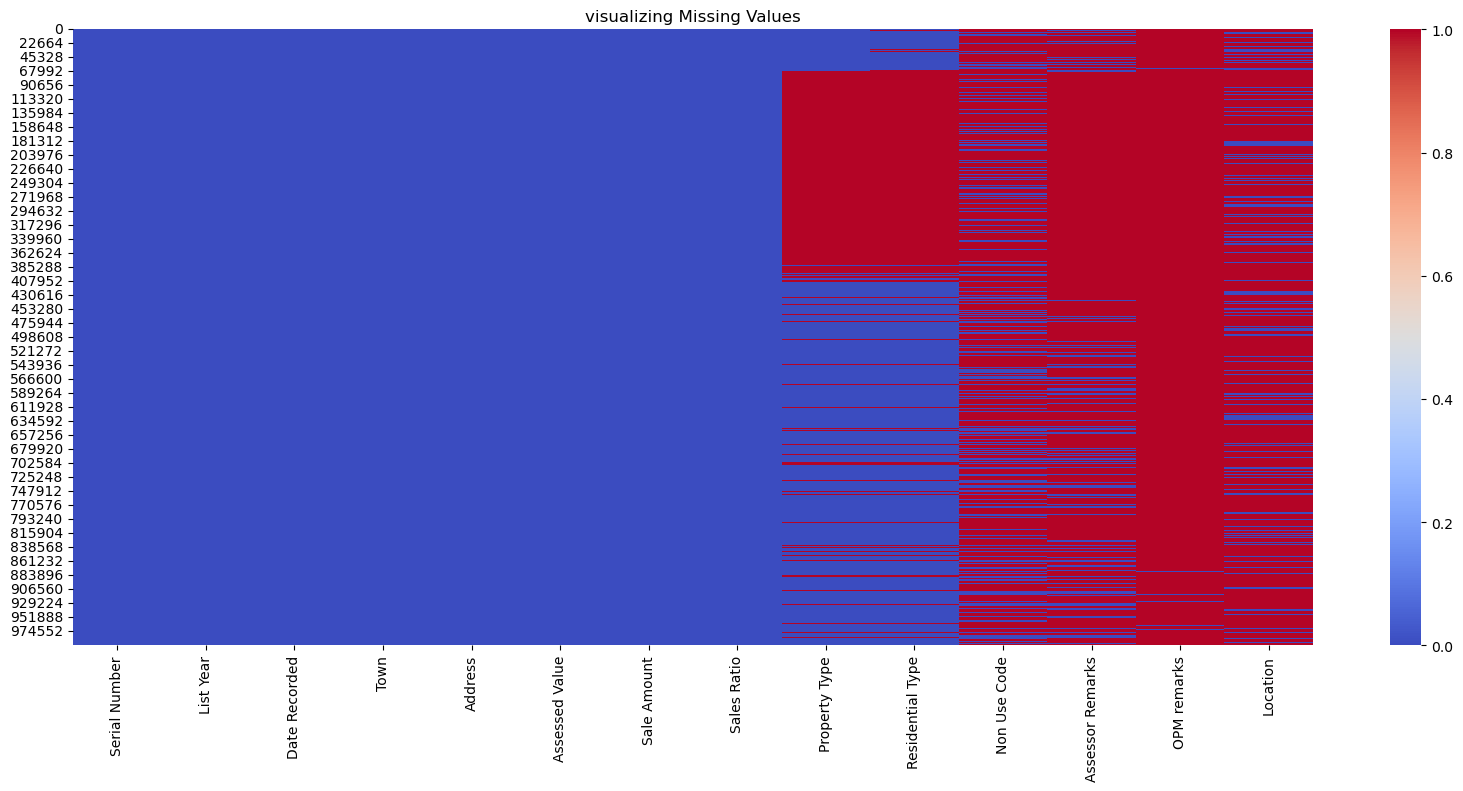

In [10]:
# Visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing Missing Values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

## DATA PREPROCESSING AND DATA CLEANING

In [11]:
# Drop rows with missing values in 'Address' and 'Date Recorded'
df = df.dropna(subset=['Address', 'Date Recorded'])

# Confirm that the rows have been dropped
print(df.isnull().sum())

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code        707529
Assessor Remarks    847299
OPM remarks         987228
Location            799470
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997162 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997162 non-null  int64         
 1   List Year         997162 non-null  int64         
 2   Date Recorded     997162 non-null  datetime64[ns]
 3   Town              997162 non-null  object        
 4   Address           997162 non-null  object        
 5   Assessed Value    997162 non-null  float64       
 6   Sale Amount       997162 non-null  float64       
 7   Sales Ratio       997162 non-null  float64       
 8   Property Type     614763 non-null  object        
 9   Residential Type  608900 non-null  object        
 10  Non Use Code      289633 non-null  object        
 11  Assessor Remarks  149863 non-null  object        
 12  OPM remarks       9934 non-null    object        
 13  Location          197692 non-null  object        
dtypes: dateti

In [13]:
from sklearn.impute import SimpleImputer

# Columns with missing values
columns_with_missing = ['Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location']

# SimpleImputer with strategy 'most_frequent' (mode) for object columns
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to selected columns using .loc to avoid SettingWithCopyWarning
df.loc[:, columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

# Confirm that there are no more missing values
print(df.isnull().sum())

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64


In [14]:
# Assuming 'OPM Remarks' is the name of the column
df = df[df['OPM remarks'] != 'INCORRECT SALE PRICE']

`Removing incorrect sales price`

In [15]:
#changing the datatype of Time column
df["Date Recorded"] = pd.to_datetime(df["Date Recorded"])

In [16]:
#Run a descriptive analysis on numeric features (columns).
numeric_columns = df.select_dtypes(include= ["number","float"])
numeric_columns.describe()

Serial Number      List Year  Assessed Value   Sale Amount  \
count   9.971600e+05  997160.000000    9.971600e+05  9.971600e+05   
mean    4.311663e+05    2010.190089    2.791521e+05  3.859493e+05   
std     6.549333e+06       6.237861    1.670651e+06  1.868097e+06   
min     8.100000e+01    2001.000000    0.000000e+00  0.000000e+00   
25%     3.044400e+04    2004.000000    8.760000e+04  1.400000e+05   
50%     7.030400e+04    2010.000000    1.383900e+05  2.250000e+05   
75%     1.518872e+05    2016.000000    2.255800e+05  3.650000e+05   
max     2.000500e+09    2020.000000    8.815100e+08  3.955000e+08   

        Sales Ratio  
count  9.971600e+05  
mean   1.044688e+01  
std    1.890242e+03  
min    0.000000e+00  
25%    4.867197e-01  
50%    6.246000e-01  
75%    7.852972e-01  
max    1.226420e+06

In [17]:
df

Serial Number  List Year Date Recorded           Town  \
0             2020348       2020    2021-09-13        Ansonia   
1               20002       2020    2020-10-02        Ashford   
2              200212       2020    2021-03-09           Avon   
3              200243       2020    2021-04-13           Avon   
4              200377       2020    2021-07-02           Avon   
...               ...        ...           ...            ...   
997208         190272       2019    2020-06-24     New London   
997209         190284       2019    2019-11-27      Waterbury   
997210         190129       2019    2020-04-27  Windsor Locks   
997211         190504       2019    2020-06-03     Middletown   
997212         190344       2019    2019-12-20        Milford   

                      Address  Assessed Value  Sale Amount  Sales Ratio  \
0             230 WAKELEE AVE        150500.0     325000.0     0.463000   
1             390 TURNPIKE RD        253000.0     430000.0     0.588300   
2            5 CHESTNUT DRIVE        130400.0     179900.0     0.724800   
3       111 NORTHINGTON DRIVE        619290.0     890000.0     0.695800   
4          70 FAR HILLS DRIVE        862330.0    1447500.0     0.595700   
...                       ...             ...          ...          ...   
997208            4 BISHOP CT         60410.0      53100.0     1.137665   
997209        126 PERKINS AVE         68280.0      76000.0     0.898400   
997210         19 HATHAWAY ST        121450.0     210000.0     0.578300   
997211           8 BYSTREK DR        203360.0     280000.0     0.726300   
997212        250 RESEARCH DR       4035970.0    7450000.0     0.541700   

        Property Type Residential Type      Non Use Code Assessor Remarks  \
0          Commercial    Single Family        25 - Other      ESTATE SALE   
1         Residential    Single Family        25 - Other      ESTATE SALE   
2         Residential            Condo        25 - Other      ESTATE SALE   
3         Residential    Single Family        25 - Other      ESTATE SALE   
4         Residential    Single Family        25 - Other      ESTATE SALE   
...               ...              ...               ...              ...   
997208  Single Family    Single Family  14 - Foreclosure      ESTATE SALE   
997209  Single Family    Single Family        25 - Other     PRIVATE SALE   
997210  Single Family    Single Family        25 - Other      ESTATE SALE   
997211  Single Family    Single Family        25 - Other      ESTATE SALE   
997212  Single Family    Single Family        25 - Other      ESTATE SALE   

              OPM remarks                    Location  
0       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
1       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
2       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
3       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
4       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
...                   ...                         ...  
997208  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
997209  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
997210  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
997211  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  
997212  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  

[997160 rows x 14 columns]

In [18]:
# Extract latitude and longitude from the 'Location' column
df['Longitude'] = df['Location'].apply(lambda x: float(x.split()[1][1:]) if isinstance(x, str) else np.nan)
df['Latitude'] = df['Location'].apply(lambda x: float(x.split()[2][:-1]) if isinstance(x, str) else np.nan)

# Use .loc to modify the DataFrame without warnings
df.loc[:, 'Longitude'] = df['Longitude']
df.loc[:, 'Latitude'] = df['Latitude']

# Drop the original 'Location' column if needed
# df = df.drop(columns=['Location'])

# Display the DataFrame with the new columns
print(df[['Longitude', 'Latitude']])


        Longitude  Latitude
0       -72.36336  41.97461
1       -72.36336  41.97461
2       -72.36336  41.97461
3       -72.36336  41.97461
4       -72.36336  41.97461
...           ...       ...
997208  -72.36336  41.97461
997209  -72.36336  41.97461
997210  -72.36336  41.97461
997211  -72.36336  41.97461
997212  -72.36336  41.97461

[997160 rows x 2 columns]


In [19]:
df.tail(100)

Serial Number  List Year Date Recorded           Town  \
997113         191175       2019    2020-08-25        Norwalk   
997114         190896       2019    2020-07-28  West Hartford   
997115          19157       2019    2020-02-18      Watertown   
997116         190039       2019    2019-12-16      Woodstock   
997117         190216       2019    2019-12-18        Meriden   
...               ...        ...           ...            ...   
997208         190272       2019    2020-06-24     New London   
997209         190284       2019    2019-11-27      Waterbury   
997210         190129       2019    2020-04-27  Windsor Locks   
997211         190504       2019    2020-06-03     Middletown   
997212         190344       2019    2019-12-20        Milford   

                    Address  Assessed Value  Sale Amount  Sales Ratio  \
997113        17 ELEANOR LN        231250.0     469900.0     0.492100   
997114  166 CLIFFMORE DRIVE        282310.0     553000.0     0.510500   
997115         189 PLATT RD        269100.0     605000.0     0.444800   
997116       45 JEANS COURT        313700.0     535000.0     0.586400   
997117          18 PEARL ST        109060.0     190000.0     0.574000   
...                     ...             ...          ...          ...   
997208          4 BISHOP CT         60410.0      53100.0     1.137665   
997209      126 PERKINS AVE         68280.0      76000.0     0.898400   
997210       19 HATHAWAY ST        121450.0     210000.0     0.578300   
997211         8 BYSTREK DR        203360.0     280000.0     0.726300   
997212      250 RESEARCH DR       4035970.0    7450000.0     0.541700   

        Property Type Residential Type      Non Use Code  \
997113  Single Family    Single Family        25 - Other   
997114  Single Family    Single Family        25 - Other   
997115  Single Family    Single Family        25 - Other   
997116  Single Family    Single Family        25 - Other   
997117  Single Family    Single Family  14 - Foreclosure   
...               ...              ...               ...   
997208  Single Family    Single Family  14 - Foreclosure   
997209  Single Family    Single Family        25 - Other   
997210  Single Family    Single Family        25 - Other   
997211  Single Family    Single Family        25 - Other   
997212  Single Family    Single Family        25 - Other   

                    Assessor Remarks        OPM remarks  \
997113                    5-56-632-0  GOOD SALE PER MLS   
997114                   ESTATE SALE  GOOD SALE PER MLS   
997115  SALE INCLUDES PARCEL 85 9 7B    INCLUDES #19158   
997116                   ESTATE SALE  GOOD SALE PER MLS   
997117                   ESTATE SALE  GOOD SALE PER MLS   
...                              ...                ...   
997208                   ESTATE SALE  GOOD SALE PER MLS   
997209                  PRIVATE SALE  GOOD SALE PER MLS   
997210                   ESTATE SALE  GOOD SALE PER MLS   
997211                   ESTATE SALE  GOOD SALE PER MLS   
997212                   ESTATE SALE  GOOD SALE PER MLS   

                          Location  Longitude  Latitude  
997113  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997114   POINT (-72.7521 41.77368)  -72.75210  41.77368  
997115  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997116  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997117  POINT (-72.36336 41.97461)  -72.36336  41.97461  
...                            ...        ...       ...  
997208  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997209  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997210  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997211  POINT (-72.36336 41.97461)  -72.36336  41.97461  
997212  POINT (-72.36336 41.97461)  -72.36336  41.97461  

[100 rows x 16 columns]

### Checking consistency

In [20]:
# Assuming 'NonUseCodeColumn' is the name of the column you want to convert to string
df['Non Use Code'] = df['Non Use Code'].astype(str)


### Univariate Analysis and Bivariate Analysis

In [21]:
#value count for Property_Type
property = df["Property Type"].value_counts()
property

Property Type
Single Family     784009
Condo             105419
Residential        60727
Two Family         26407
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           485
Industrial           228
Public Utility         5
Name: count, dtype: int64

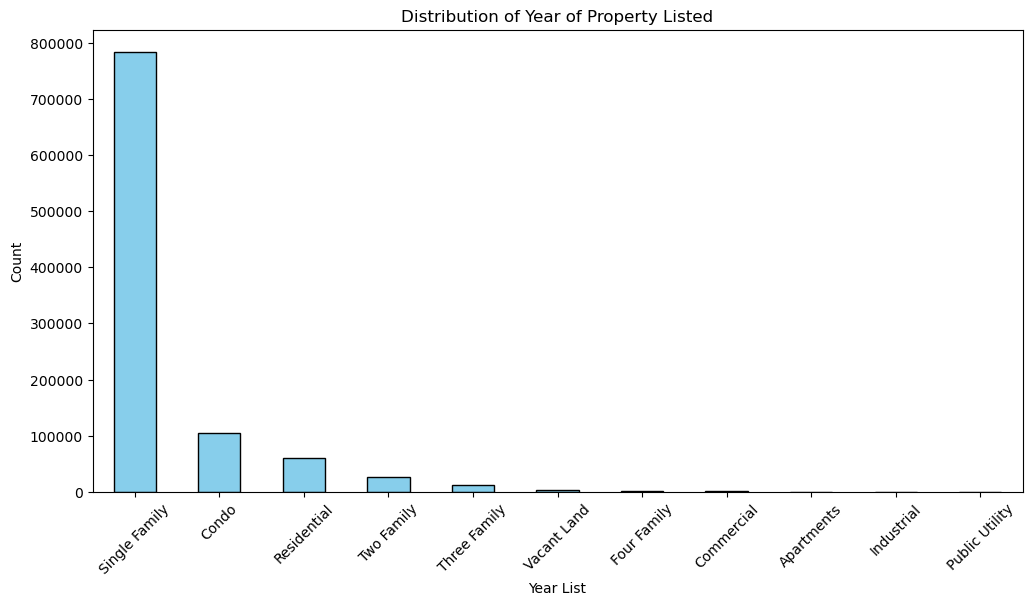

In [22]:
#bar plot for Property Type
property.plot(kind='bar', color='skyblue', edgecolor = 'black',figsize = (12, 6))
plt.xticks(rotation=45)
plt.title('Distribution of Year of Property Listed')
plt.xlabel('Year List')
plt.ylabel('Count')
plt.show()

`Single-family homes are the most popular property type, with a count of 784009 and Public Utility properties are the least popular with only 5 counts` 

In [23]:
#value count for Residential_Type
Residential = df["Residential Type"].value_counts()
Residential

Residential Type
Single Family    833275
Condo            117779
Two Family        29608
Three Family      14080
Four Family        2418
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot for Residential Type')

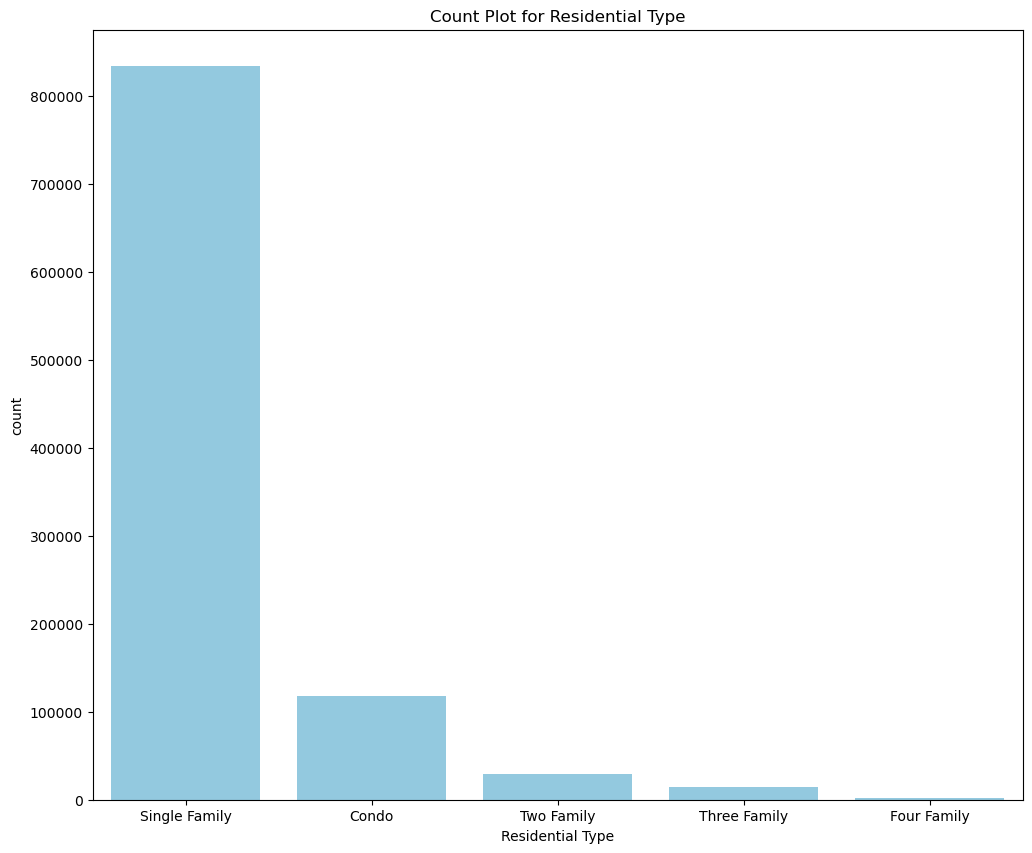

In [24]:
#count plot for Residential Type
plt.figure(figsize=(12, 10))
sns.countplot(data = df, x = "Residential Type", color = 'skyblue');
plt.title("Count Plot for Residential Type")

`Single-family homes are the most popuular, with a count of 833,276 making it the highest value count in the residential type, and Four-family properties have the lowest count with a value of  2,418  making it the lowest value count in the residential type.`

### BIVARIATE ANALYSIS

### Exploratory Data Analysis for Objective 1:

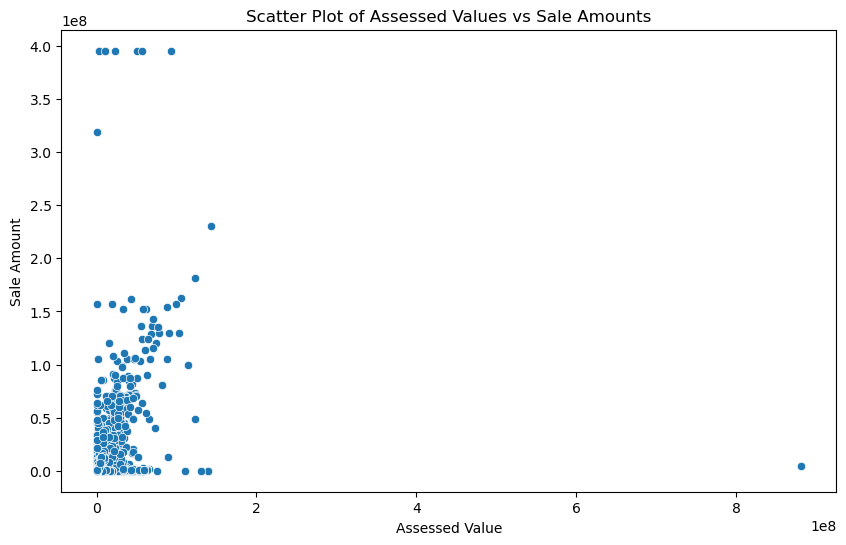

In [25]:
# Scatter Plot of Assessed Values vs Sale Amounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df)
plt.title('Scatter Plot of Assessed Values vs Sale Amounts')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.show()


`The scatter plot highlights that the majority of Sales Amounts and Assessed Values fall within the 0 to 150 million range. However, the presence of extreme outliers suggests potential data entry errors or unique market conditions, such as a robust real estate market or properties with exceptional features`

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


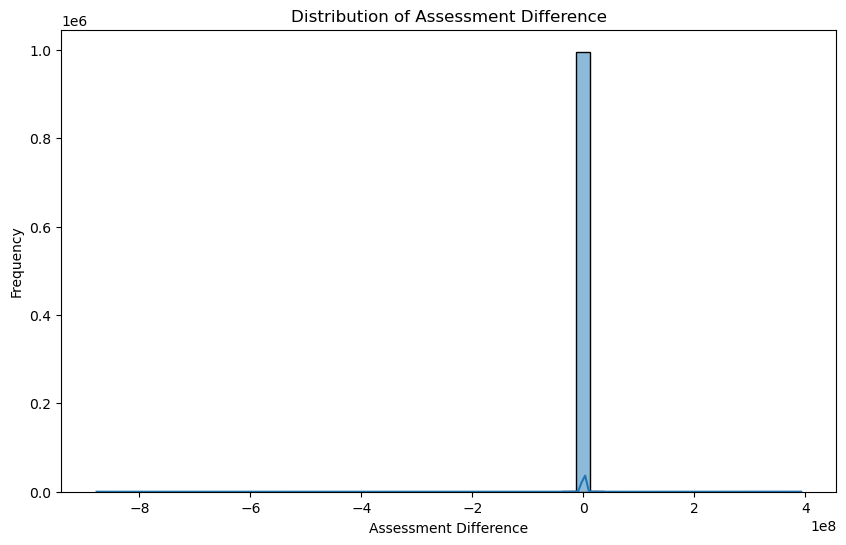

Summary Statistics of Assessment Difference:
 count    9.971600e+05
mean     1.067972e+05
std      2.077946e+06
min     -8.768300e+08
25%      3.397000e+04
50%      8.455000e+04
75%      1.528930e+05
max      3.922993e+08
Name: Assessment_Difference, dtype: float64


In [26]:
# Calculate the difference between Assessed Value and Sale Amount
df['Assessment_Difference'] = df['Sale Amount'] - df['Assessed Value']


# Summary statistics of the assessment difference
assessment_difference_stats = df['Assessment_Difference'].describe()


plt.figure(figsize=(10, 6))
sns.histplot(df['Assessment_Difference'], bins=50, kde=True)
plt.title('Distribution of Assessment Difference')
plt.xlabel('Assessment Difference')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print("Summary Statistics of Assessment Difference:\n", assessment_difference_stats)


## The summary statistics provide insights into the distribution of the assessment differences

### Here are some key points to consider:

1. Mean (average): The average assessment difference is approximately $106,160.

2. Standard Deviation (Std): A significant standard deviation of $2.07 million indicates notable variability in assessment differences.
   
3. Minimum and Maximum Values: The minimum assessment difference is negative, implying instances where properties were assessed below their sale amount. The maximum value is exceptionally high, suggesting potential outliers in the data.
4. 
Percentiles (25th, 50th, 75th): The median assessment difference is around $84,550, signifying that half of the assessments have differences below this value. The 25th and 75th percentiles offer insights into the spread of the data.

In [27]:
# Identify properties with unusually large assessment differences (e.g., 3 times the standard deviation)
threshold = 3 * df['Assessment_Difference'].std()
large_difference_properties = df[df['Assessment_Difference'] > threshold]

# Display information about these properties
print("Number of properties with unusually large assessment differences:", len(large_difference_properties))
print("\nDetails of some of these properties:")
large_difference_properties[['Town', 'Address', 'Assessed Value', 'Sale Amount', 'Assessment_Difference']]

Number of properties with unusually large assessment differences: 1207

Details of some of these properties:


Town                    Address  Assessed Value  Sale Amount  \
700          Bristol        1175 FARMINGTON AVE       9098880.0   29300000.0   
1361        Cheshire              280 S MAIN ST       9034220.0   21071518.0   
1537         Danbury            14 EXECUTIVE DR       9529200.0   15774500.0   
1596         Enfield             100 HAZARD AVE       3037970.0   13920000.0   
4473       Greenwich             45 HUSTED LANE       2448250.0    9750000.0   
...              ...                        ...             ...          ...   
995524       Norwalk               467 WEST AVE       7793884.0   32050000.0   
995620       Windsor            1215 KENNEDY RD        240240.0   21747582.0   
995736       Meriden              480 LEWIS AVE       4969370.0   12500000.0   
996320  Wethersfield  1130-1142 SILAS DEANE HWY       5390000.0   13000000.0   
996412       Norwalk               399 MAIN AVE      46100690.0   68500000.0   

        Assessment_Difference  
700                20201120.0  
1361               12037298.0  
1537                6245300.0  
1596               10882030.0  
4473                7301750.0  
...                       ...  
995524             24256116.0  
995620             21507342.0  
995736              7530630.0  
996320              7610000.0  
996412             22399310.0  

[1207 rows x 5 columns]

Details of properties with unusually large assessment differences:


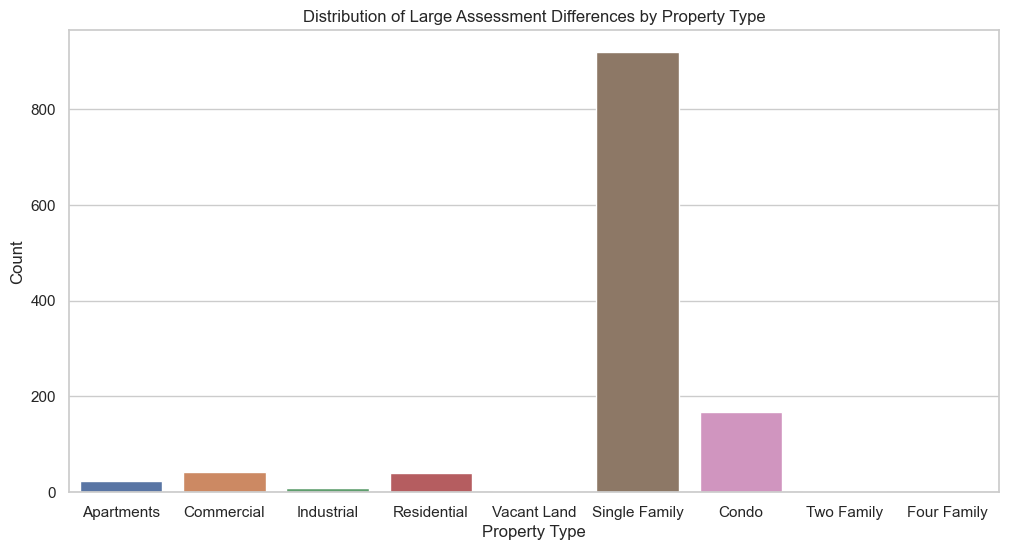

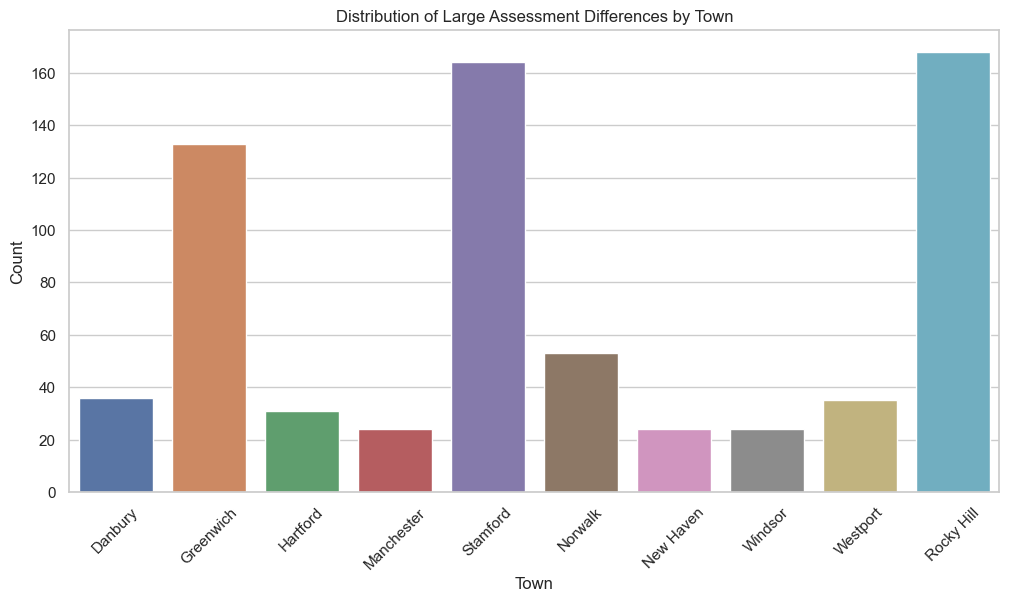

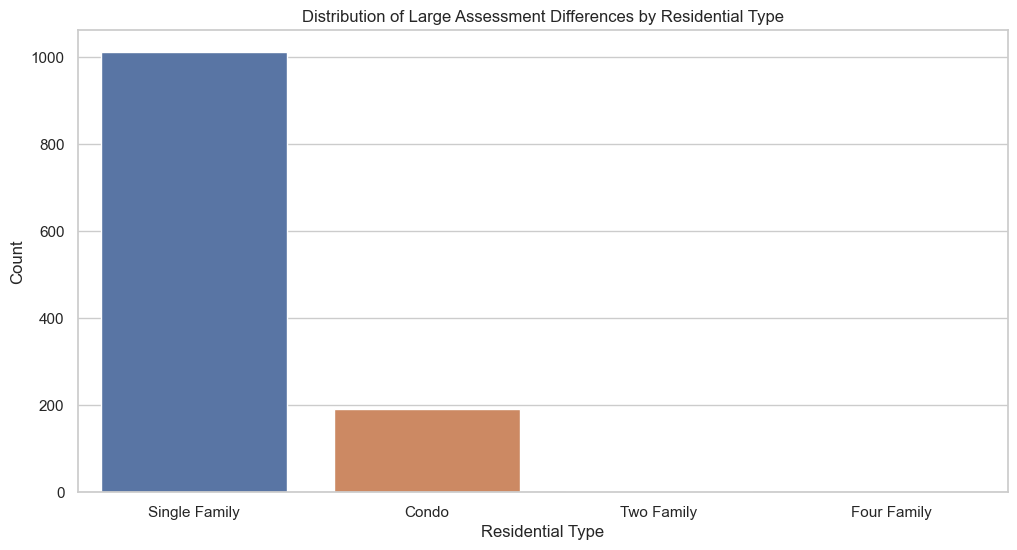

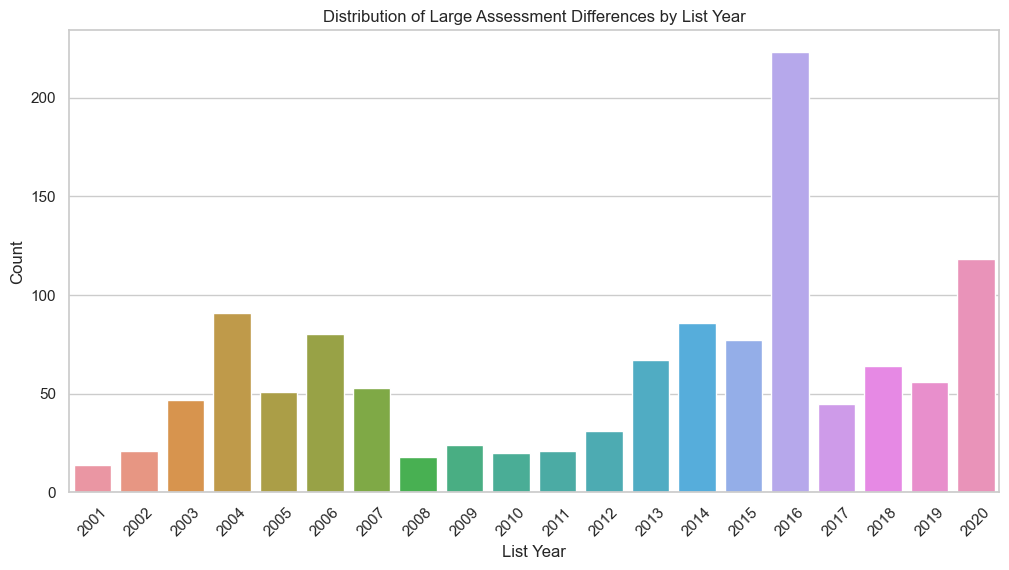

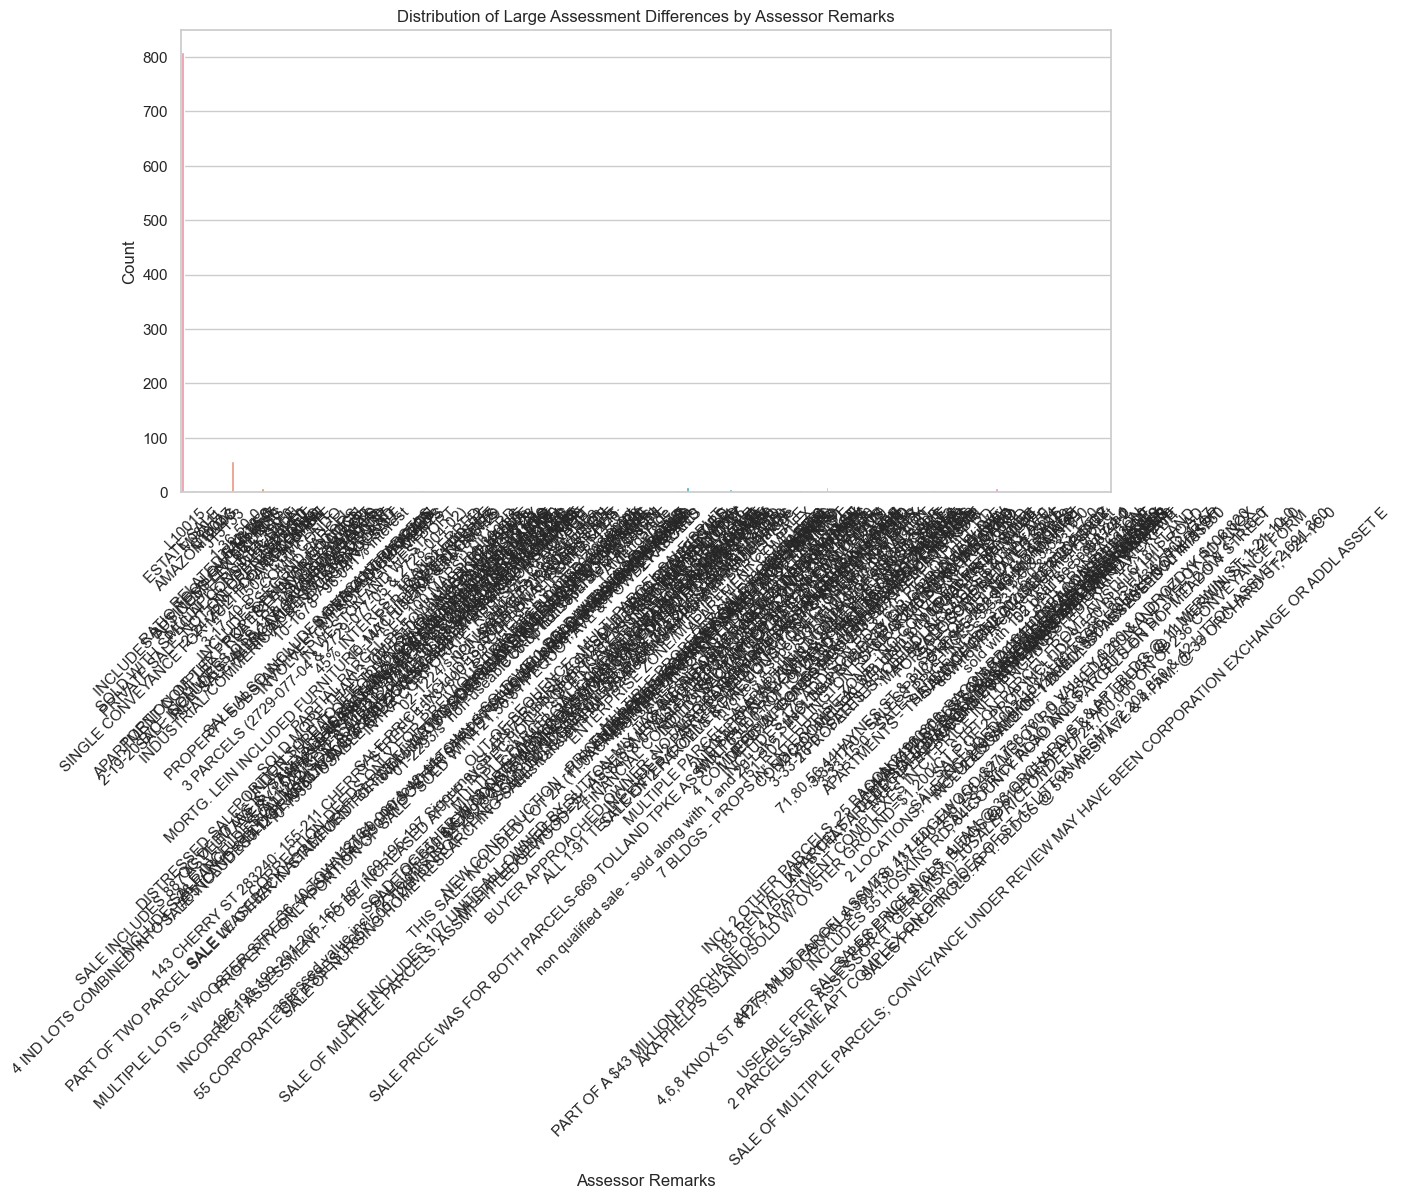

In [102]:
# Display details of the properties with unusually large assessment differences
print("Details of properties with unusually large assessment differences:")
large_difference_properties[['Town', 'Address', 'Assessed Value', 'Sale Amount', 'Assessment_Difference']]

# Explore potential reasons for large differences by property type
plt.figure(figsize=(12, 6))
sns.countplot(x='Property Type', data=large_difference_properties)
plt.title('Distribution of Large Assessment Differences by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.savefig('objective1_plot1.png')
plt.show()



# Explore potential reasons for large differences by town (top 10 towns with the highest assessment differences)
plt.figure(figsize=(12, 6))
sns.countplot(x='Town', data=large_difference_properties[large_difference_properties['Town'].isin(top_towns_large_diff)])
plt.title('Distribution of Large Assessment Differences by Town')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('objective1_plot2.png')  # Save the plot before displaying
plt.show()

# Explore potential reasons for large differences by Residential Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Residential Type', data=large_difference_properties)
plt.title('Distribution of Large Assessment Differences by Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Count')
plt.savefig('objective1_plot3.png')  # Save the plot before displaying
plt.show()

# Explore potential reasons for large differences by List Year
plt.figure(figsize=(12, 6))
sns.countplot(x='List Year', data=large_difference_properties)
plt.title('Distribution of Large Assessment Differences by List Year')
plt.xlabel('List Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('objective1_plot4.png')  # Save the plot before displaying
plt.show()

# Explore potential reasons for large differences by Assessor Remarks
plt.figure(figsize=(12, 6))
sns.countplot(x='Assessor Remarks', data=large_difference_properties)
plt.title('Distribution of Large Assessment Differences by Assessor Remarks')
plt.xlabel('Assessor Remarks')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Insights based on properties with unusually large assessment differences(Objective 1):

### Potential Reasons for Large Differences by Property Type:

1. The majority of properties with unusually large assessment differences belong to the "Single Family" property type, with a count of 280. This suggests that single-family properties may exhibit more variability in assessment differences compared to other property types.
2. "Residential" is the second-highest property type, indicating that residential properties, in general, also contribute to the large assessment differences.

### Potential Reasons for Large Differences by Town:

1. Stanford stands out as the town with the highest count (95) of properties exhibiting unusually large assessment differences. This suggests that there may be specific factors or practices in Stanford that contribute to the discrepancies in property assessments.
2. Greenwich and Norwalk are also notable with counts of 29 and 19, respectively, indicating that certain towns may have a higher prevalence of large assessment differences.

### Potential Reasons for Large Differences by Residential Type:

1. Within the "Single Family" residential type, there is a significant count of 275 properties with large assessment differences. This highlights that single-family residential properties may have distinctive characteristics contributing to assessment variations.
2. Other residential types such as "Condo," "Three Family," and "Four Family" also contribute to large assessment differences, although to a lesser extent.
   
### Potential Reasons for Large Differences by List Years:

1. The year 2020 stands out with the highest count (65) of properties having unusually large assessment differences. This indicates that assessments made in the year 2020 may have exhibited more discrepancies compared to other years.
2. Other notable years with relatively high counts include 2016, 2018, 2013, and 2019, suggesting that specific years may be associated with higher variability in assessment differences.
   
### Potential Reasons for Large Differences by Assessor Remarks:

1. The most common assessor remark associated with properties having large assessment differences is "Estate Sale," with a count of 152. This implies that properties involved in estate sales may be more likely to have significant assessment variations.
2. The presence of other remarks, such as "Multiple Parcel Sale," with a count of 38, indicates that specific circumstances surrounding property sales may influence assessment differences.

### Recommendations (Objective outcome one)

### Single Family Properties:

- Insight: The majority of large assessment differences are observed in "Single Family" properties.
- Recommendation: Initiate a detailed examination of assessment methodologies specific to single-family properties. Collaborate with assessors to understand nuances and potential areas for refinement in the assessment process for this property type.

### Town-Specific Assessment Practices:

- Insight: Stanford, Greenwich, and Norwalk exhibit higher counts of properties with large assessment differences.
- Recommendation: Engage with local authorities in these towns to explore unique factors influencing assessments. Foster collaboration between assessors to share best practices and ensure consistency in assessment methodologies across different regions.

### Residential Property Types:

- Insight: "Single Family" residential properties significantly contribute to large assessment differences.
- Recommendation: Conduct targeted training for assessors focusing on the evaluation of single-family residential properties. Encourage the adoption of standardized assessment practices to minimize variations in this property category.

### List Year Sensitivity:

- Insight: The year 2020 stands out with the highest count of properties having large assessment differences.
- Recommendation: Collaborate with assessors to review assessment procedures implemented in 2020. Identify any specific challenges or changes in market dynamics that may have influenced assessments during that period.

### Assessor Remarks Impact:

- Insight: Properties with the remark "Estate Sale" are prevalent among those with large assessment differences.
- Recommendation: Facilitate communication between assessors and estate representatives to ensure a comprehensive understanding of property conditions during estate sales. Establish guidelines for assessing properties involved in estate transactions.

### Continuous Monitoring and Adjustment:

- Recommendation: Implement a systematic approach to continuously monitor assessment data, identifying trends, and promptly addressing any deviations. Regularly update assessment practices based on market dynamics, legislative changes, and stakeholder feedback.

## Exploratory Data Analysis (EDA) for Objective 2:

In [29]:
# Recalculate Sales Ratios
df["Sales Ratio"] = df["Sale Amount"] / df["Assessed Value"]


In [30]:
df[["Sales Ratio"]].max()

Sales Ratio    inf
dtype: float64

In [31]:
# Replace NaN and inf with 0 in 'New_Sales_ratio'
df['Sales Ratio'] = df['Sales Ratio'].replace([np.nan, np.inf], 0)

#let us run the statistical summary to get a reasonable output
df['Sales Ratio'].describe().round(2)

count     997160.00
mean           8.42
std         4179.30
min            0.00
25%            1.26
50%            1.59
75%            2.03
max      4150000.00
Name: Sales Ratio, dtype: float64

### Insight on Sales Ratio Summary:
- Before Identification and Filtering:

- The mean sales ratio is 8.42, suggesting that, on average, the assessed value is 8 times lower than the sale amount. This could indicate a potential discrepancy between assessed values and actual sale amounts.
- The minimum value of 0.00 indicates instances where the assessed value is recorded as zero, potentially indicating missing or incorrect entries.
- With a maximum sales ratio of 4,150,000.00, extreme values exist where the assessed value is significantly lower than the sale amount.

In [32]:
max_sales_ratio_row = df[df["Sales Ratio"] == 4150000]
max_sales_ratio_row

Serial Number  List Year Date Recorded    Town       Address  \
816649         160511       2016    2017-03-31  Hamden  42 WARNER ST   

        Assessed Value  Sale Amount  Sales Ratio  Property Type  \
816649             1.0    4150000.0    4150000.0  Single Family   

       Residential Type Non Use Code  \
816649    Single Family   25 - Other   

                                         Assessor Remarks        OPM remarks  \
816649  MULTIPLE UNITS - 52 TOTAL - INCLUDES 655 FITCH ST  GOOD SALE PER MLS   

                          Location  Longitude  Latitude  Assessment_Difference  
816649  POINT (-72.36336 41.97461)  -72.36336  41.97461              4149999.0

`As we can observe, there was a data entry error in the datset beacause logically an Assessed value of a property cant be $1.0`

In [33]:
df[["Sales Ratio"]].min()

Sales Ratio    0.0
dtype: float64

In [34]:
min_sales_ratio_row = df[df["Sales Ratio"] == 0.0]
min_sales_ratio_row

Serial Number  List Year Date Recorded       Town  \
75              10323       2001    2002-09-23   Coventry   
86              10045       2001    2002-01-03    Bethany   
96              12532       2001    2002-08-13     Bolton   
127             10055       2001    2001-12-04   Stafford   
133             10502       2001    2002-01-15  Stratford   
...               ...        ...           ...        ...   
992904         190045       2019    2019-11-22    Windham   
994922         190355       2019    2020-04-02     Oxford   
996063         190290       2019    2020-06-04   Simsbury   
996597         190409       2019    2020-07-01     Oxford   
996735         190202       2019    2020-03-31  Waterford   

                    Address  Assessed Value  Sale Amount  Sales Ratio  \
75          400 EASTVIEW DR             0.0     325400.0          0.0   
86             9 SIMPSON CT         96590.0          0.0          0.0   
96             45 BEACON CT             0.0      12350.0          0.0   
127          15 JENNIFER LN             0.0     165155.0          0.0   
133        1101 SUCCESS AVE             0.0      50000.0          0.0   
...                     ...             ...          ...          ...   
992904   234 BEAVER HILL RD             0.0      30000.0          0.0   
994922    1029 TURNBERRY CT             0.0     418905.0          0.0   
996063    24 HENDRICKS LANE             0.0     230450.0          0.0   
996597  735 CHAMPIONSHIP DR             0.0     482850.0          0.0   
996735          7 THIRD AVE             0.0      85000.0          0.0   

        Property Type Residential Type              Non Use Code  \
75      Single Family    Single Family                         7   
86      Single Family    Single Family                         1   
96      Single Family    Single Family                         8   
127     Single Family    Single Family                         7   
133     Single Family    Single Family                        25   
...               ...              ...                       ...   
992904  Single Family    Single Family  06 - Portion of Property   
994922          Condo            Condo   07 - Change in Property   
996063  Single Family    Single Family   07 - Change in Property   
996597          Condo            Condo   07 - Change in Property   
996735  Single Family    Single Family                25 - Other   

                    Assessor Remarks        OPM remarks  \
75                       ESTATE SALE  GOOD SALE PER MLS   
86                       ESTATE SALE  GOOD SALE PER MLS   
96                       ESTATE SALE  GOOD SALE PER MLS   
127                      ESTATE SALE  GOOD SALE PER MLS   
133                      ESTATE SALE  GOOD SALE PER MLS   
...                              ...                ...   
992904                   ESTATE SALE  GOOD SALE PER MLS   
994922                   ESTATE SALE  GOOD SALE PER MLS   
996063  10/1/19 VACANT - CO MAY 2020  GOOD SALE PER MLS   
996597                   ESTATE SALE  GOOD SALE PER MLS   
996735                   ESTATE SALE  GOOD SALE PER MLS   

                          Location  Longitude  Latitude  Assessment_Difference  
75      POINT (-72.36336 41.97461)  -72.36336  41.97461               325400.0  
86      POINT (-72.36336 41.97461)  -72.36336  41.97461               -96590.0  
96      POINT (-72.36336 41.97461)  -72.36336  41.97461                12350.0  
127     POINT (-72.36336 41.97461)  -72.36336  41.97461               165155.0  
133     POINT (-72.36336 41.97461)  -72.36336  41.97461                50000.0  
...                            ...        ...       ...                    ...  
992904  POINT (-72.36336 41.97461)  -72.36336  41.97461                30000.0  
994922  POINT (-72.36336 41.97461)  -72.36336  41.97461               418905.0  
996063  POINT (-72.36336 41.97461)  -72.36336  41.97461               230450.0  
996597  POINT (-72.36336 41.97461)  -72.36336  41.97461       

### Identify and Filter Out Missing or Incorrect Entries:
- Create a mask to identify rows where both "Sales Ratio" and "Sale Amount" are 0.0 and values that are not logical, and optionally where "Assessed Value" is also 0.0 and values that are not logical.

In [35]:
 # Remove rows where Sales Amount or Assessed Value is 0.0 or 1.0
missing_rows  = df[(df["Sale Amount"] <= 1000.0) & (df["Assessed Value"] <= 1000.0)]

In [36]:
# Assessment of Impact:
percentage_missing = len(missing_rows) / len(df) * 100
print(f"Percentage of missing or incorrect entries: {percentage_missing:.2f}%")

Percentage of missing or incorrect entries: 0.03%


### Handling zero Values:

In [37]:
# Drop rows with missing or incorrect entries
# Remove rows where Sales Amount or Assessed Value is 0.0 or 1.0
df1 = df[(df["Sale Amount"] > 1000.0) & (df["Assessed Value"] > 1000.0)]


In [38]:
df1[["Sales Ratio"]].max()

Sales Ratio    10329.985653
dtype: float64

In [39]:
#let us run the statistical summary again
df1['Sales Ratio'].describe().round(2)

count    987156.00
mean          2.32
std          21.72
min           0.00
25%           1.27
50%           1.59
75%           2.04
max       10329.99
Name: Sales Ratio, dtype: float64

### Insight on Sales Ratio Summary:
- The mean sales ratio is now 2.32, reflecting a reduction from the initial mean. This indicates that, on average, the assessed value is 2.32 times lower than the sale amount after addressing missing or incorrect entries.

- The minimum value remains at 0.00, suggesting that entries with zero assessed values persist even after filtering.

- The 25th, 50th, and 75th percentiles provide insights into the spread of the data, indicating potential variability and the impact of filtering on the distribution of sales ratios.

- The maximum sales ratio is now 10,329.99, which, while reduced from the initial maximum, still highlights extreme values where the assessed value is significantly lower than the sale amount.

### Comparison:

- The filtering process appears to have had a notable impact on the mean sales ratio, reducing it from 8.42 to 2.32. This suggests that addressing missing or incorrect entries has contributed to a more accurate representation of the relationship between assessed values and sale amounts.

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


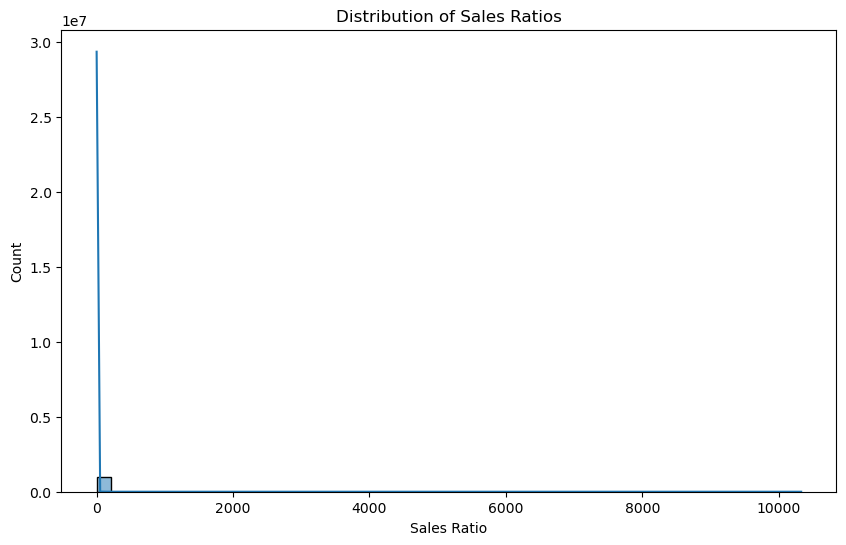

In [40]:
# Distribution of Sales Ratios
plt.figure(figsize=(10, 6))
sns.histplot(df1['Sales Ratio'], bins=50, kde=True)
plt.title('Distribution of Sales Ratios')
plt.xlabel('Sales Ratio')
plt.show()

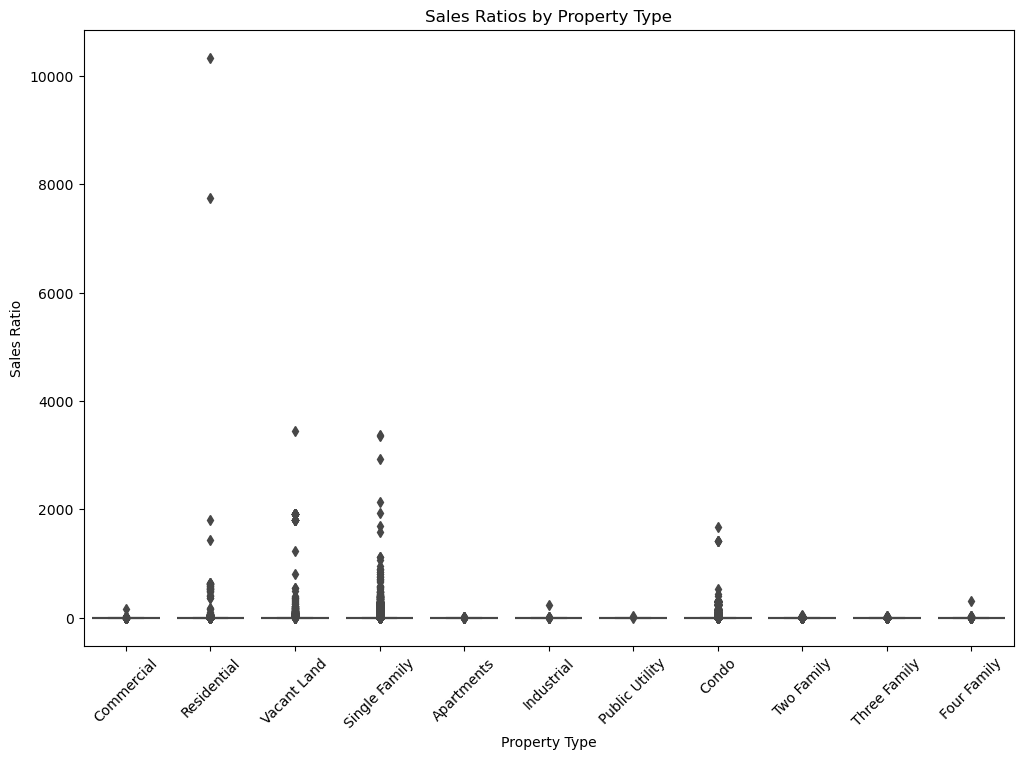

In [41]:
# Boxplot of Sales Ratios by Property Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Property Type', y='Sales Ratio', data=df1)
plt.title('Sales Ratios by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.show()


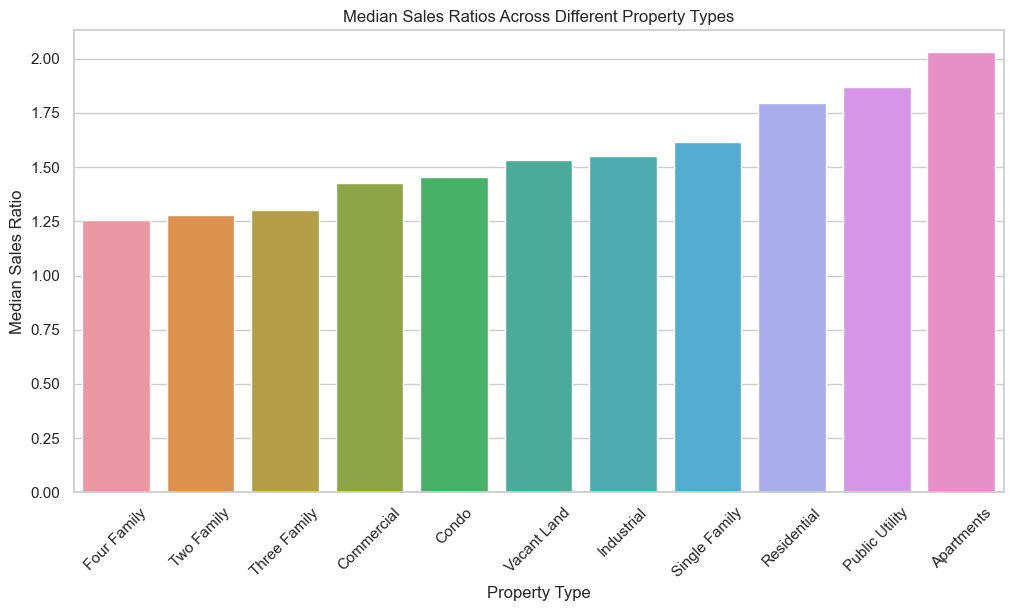

In [103]:
# Calculate median sales ratio for each property type
median_sales_ratios = df1.groupby('Property Type')['Sales Ratio'].median().sort_values()

# Plotting the median sales ratio for each property type
plt.figure(figsize=(12, 6))
sns.barplot(x=median_sales_ratios.index, y=median_sales_ratios.values)
plt.title('Median Sales Ratios Across Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Median Sales Ratio')
plt.xticks(rotation=45)
plt.savefig('objective2_plot1.png')
plt.show()


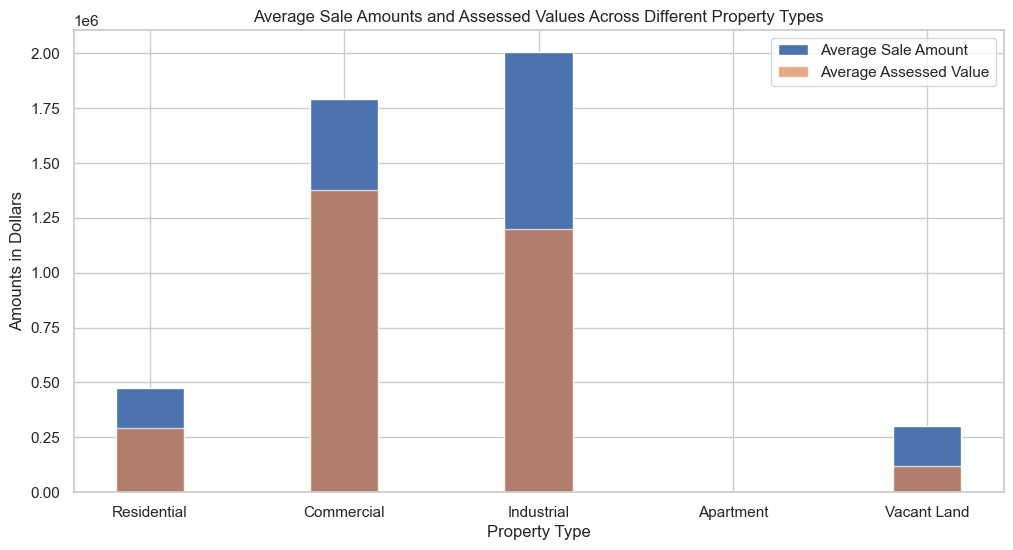

In [104]:
# Calculate average sale amounts and assessed values for each property type
avg_sale_amount_residential = df1[df1['Property Type'] == 'Residential']['Sale Amount'].mean()
avg_assessed_value_residential = df1[df1['Property Type'] == 'Residential']['Assessed Value'].mean()

avg_sale_amount_commercial = df1[df1['Property Type'] == 'Commercial']['Sale Amount'].mean()
avg_assessed_value_commercial = df1[df1['Property Type'] == 'Commercial']['Assessed Value'].mean()

avg_sale_amount_industrial = df1[df1['Property Type'] == 'Industrial']['Sale Amount'].mean()
avg_assessed_value_industrial = df1[df1['Property Type'] == 'Industrial']['Assessed Value'].mean()

avg_sale_amount_apartment = df1[df1['Property Type'] == 'Apartment']['Sale Amount'].mean()
avg_assessed_value_apartment = df1[df1['Property Type'] == 'Apartment']['Assessed Value'].mean()

avg_sale_amount_vacant_land = df1[df1['Property Type'] == 'Vacant Land']['Sale Amount'].mean()
avg_assessed_value_vacant_land = df1[df1['Property Type'] == 'Vacant Land']['Assessed Value'].mean()

# Plotting bar chart for average sale amounts and assessed values across property types
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(['Residential', 'Commercial', 'Industrial', 'Apartment', 'Vacant Land'],
        [avg_sale_amount_residential, avg_sale_amount_commercial, avg_sale_amount_industrial, avg_sale_amount_apartment, avg_sale_amount_vacant_land],
        width=bar_width, label='Average Sale Amount')

plt.bar(['Residential', 'Commercial', 'Industrial', 'Apartment', 'Vacant Land'],
        [avg_assessed_value_residential, avg_assessed_value_commercial, avg_assessed_value_industrial, avg_assessed_value_apartment, avg_assessed_value_vacant_land],
        width=bar_width, label='Average Assessed Value', alpha=0.7)

plt.title('Average Sale Amounts and Assessed Values Across Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Amounts in Dollars')
plt.legend()
plt.savefig('objective2_plot2.png')
plt.show()


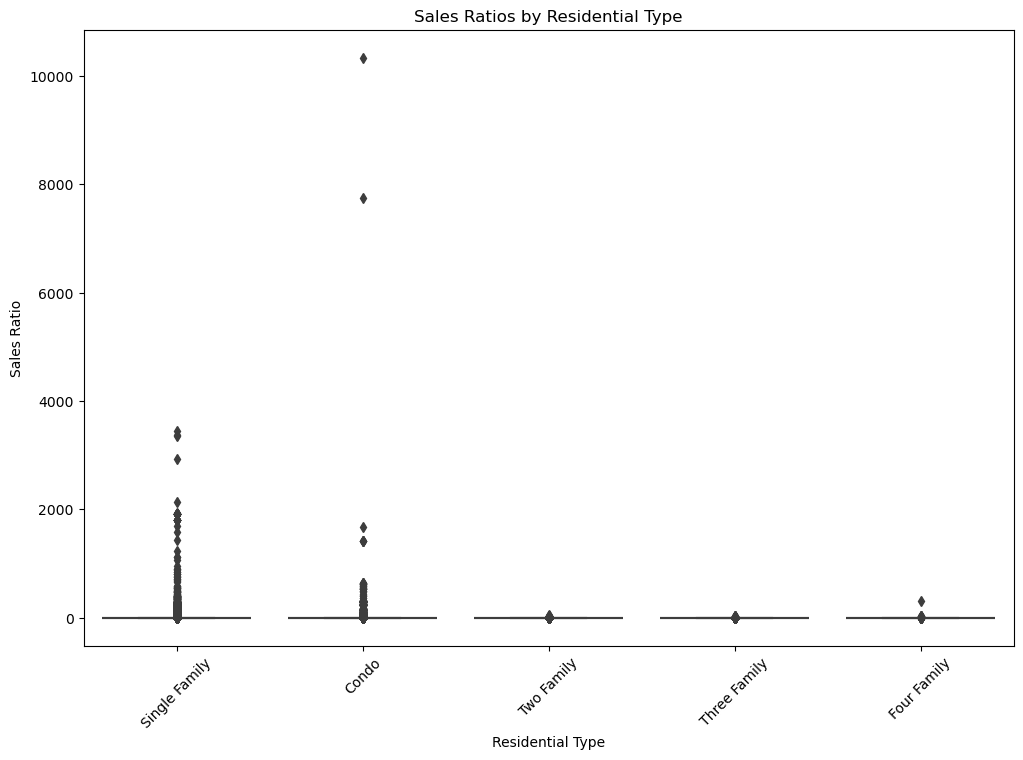

In [44]:
# Boxplot of Sales Ratios by Residential Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Residential Type', y='Sales Ratio', data=df1)
plt.title('Sales Ratios by Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.show()


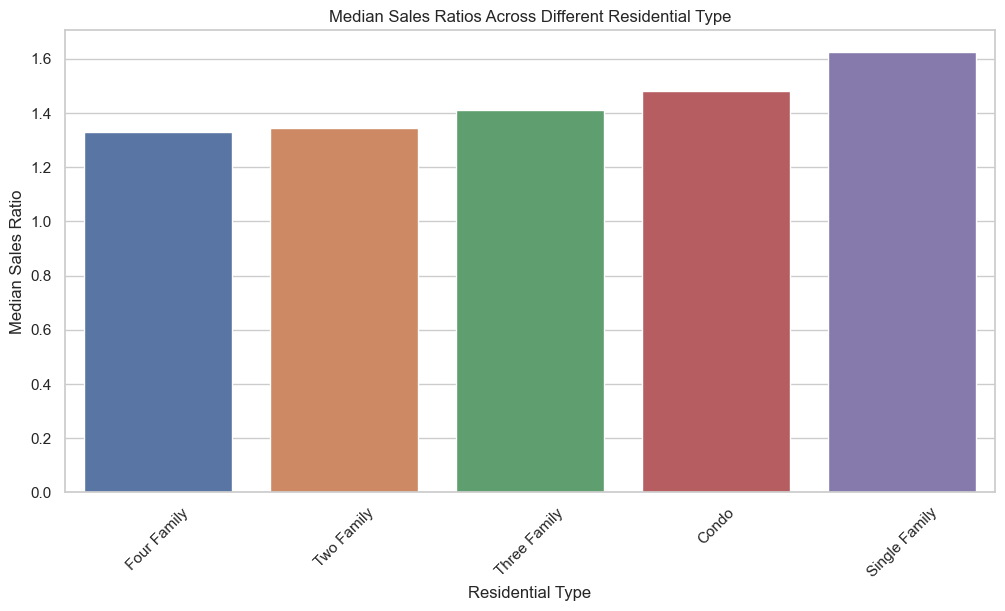

In [105]:
# Calculate median sales ratio for each property type
median_sales_ratios = df.groupby('Residential Type')['Sales Ratio'].median().sort_values()

# Plotting the median sales ratio for each property type
plt.figure(figsize=(12, 6))
sns.barplot(x=median_sales_ratios.index, y=median_sales_ratios.values)
plt.title('Median Sales Ratios Across Different Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Median Sales Ratio')
plt.xticks(rotation=45)
plt.savefig('objective2_plot3.png')
plt.show()


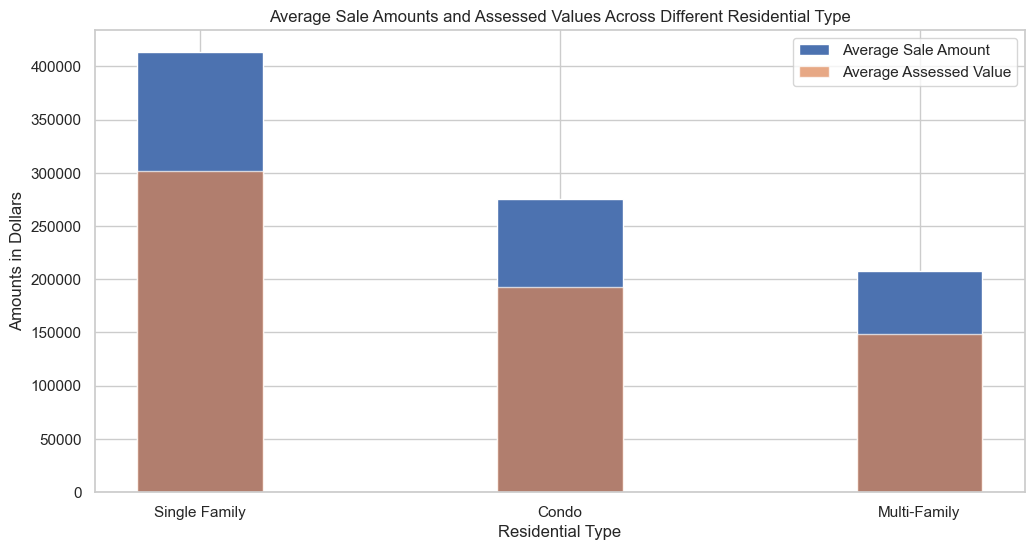

In [106]:
# Filter data for single-family homes, condos, and multi-family dwellings
single_family_data = df1[df1['Residential Type'] == 'Single Family']
condo_data = df1[df1['Residential Type'] == 'Condo']
multi_family_data = df1[df1['Residential Type'].isin(['Two Family', 'Three Family', 'Four Family'])]

# Calculate average sale amounts and assessed values for each property type
avg_sale_amount_single_family = single_family_data['Sale Amount'].mean()
avg_assessed_value_single_family = single_family_data['Assessed Value'].mean()

avg_sale_amount_condo = condo_data['Sale Amount'].mean()
avg_assessed_value_condo = condo_data['Assessed Value'].mean()

avg_sale_amount_multi_family = multi_family_data['Sale Amount'].mean()
avg_assessed_value_multi_family = multi_family_data['Assessed Value'].mean()

# Plotting bar chart for average sale amounts and assessed values across property types
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(['Single Family', 'Condo', 'Multi-Family'], [avg_sale_amount_single_family, avg_sale_amount_condo, avg_sale_amount_multi_family],
        width=bar_width, label='Average Sale Amount')

plt.bar(['Single Family', 'Condo', 'Multi-Family'], [avg_assessed_value_single_family, avg_assessed_value_condo, avg_assessed_value_multi_family],
        width=bar_width, label='Average Assessed Value', alpha=0.7)

plt.title('Average Sale Amounts and Assessed Values Across Different Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Amounts in Dollars')
plt.legend()
plt.savefig('objective2_plot4.png')
plt.show()


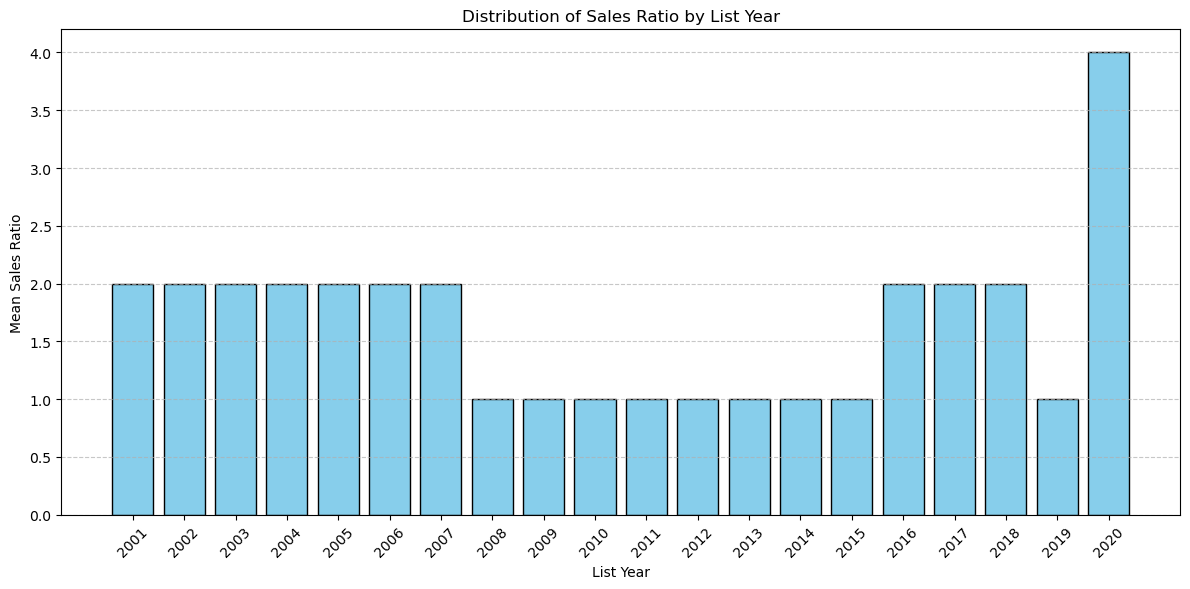

In [47]:
##Group the sales ratio by Year #Additional Insight.
Grouped_Year = df1.groupby('List Year')['Sales Ratio'].mean().astype('int').sort_values(ascending = False)

#bar chart to show clearer insights 
plt.figure(figsize=(12, 6))
plt.bar(Grouped_Year.index, Grouped_Year.values, color='skyblue',edgecolor = 'black')

# Adding labels and title
plt.xlabel('List Year')
plt.ylabel('Mean Sales Ratio')
plt.title('Distribution of Sales Ratio by List Year')

# Display the plot
plt.xticks(Grouped_Year.index.astype(int), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


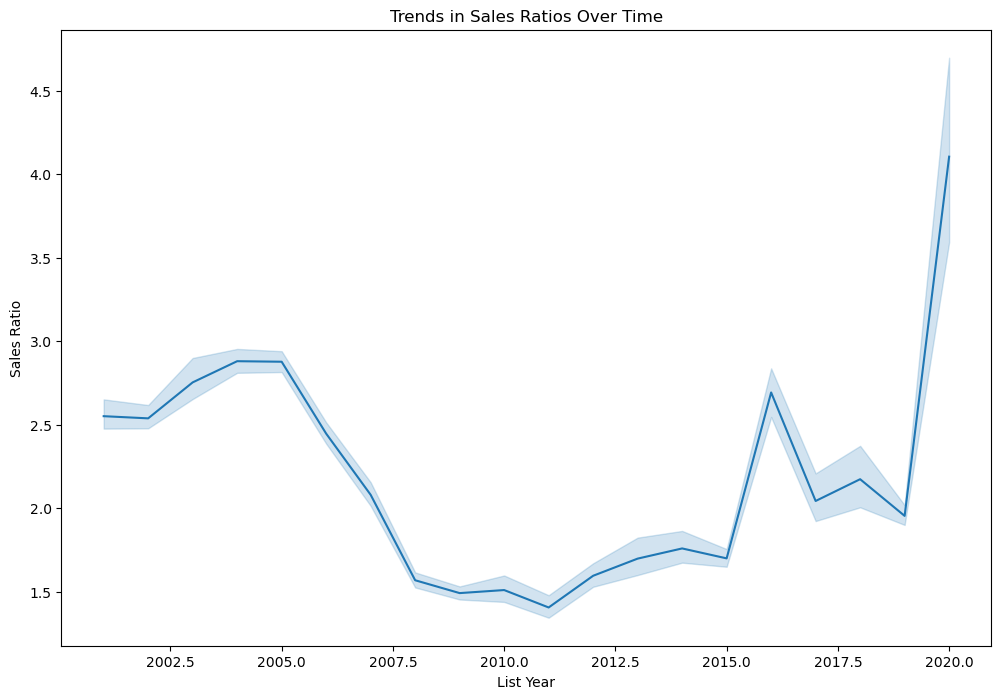

In [48]:
# Line plot of Sales Ratios over time (by List Year)
plt.figure(figsize=(12, 8))
sns.lineplot(x='List Year', y='Sales Ratio', data=df1)
plt.title('Trends in Sales Ratios Over Time')
plt.xlabel('List Year')
plt.ylabel('Sales Ratio')
plt.show()


C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


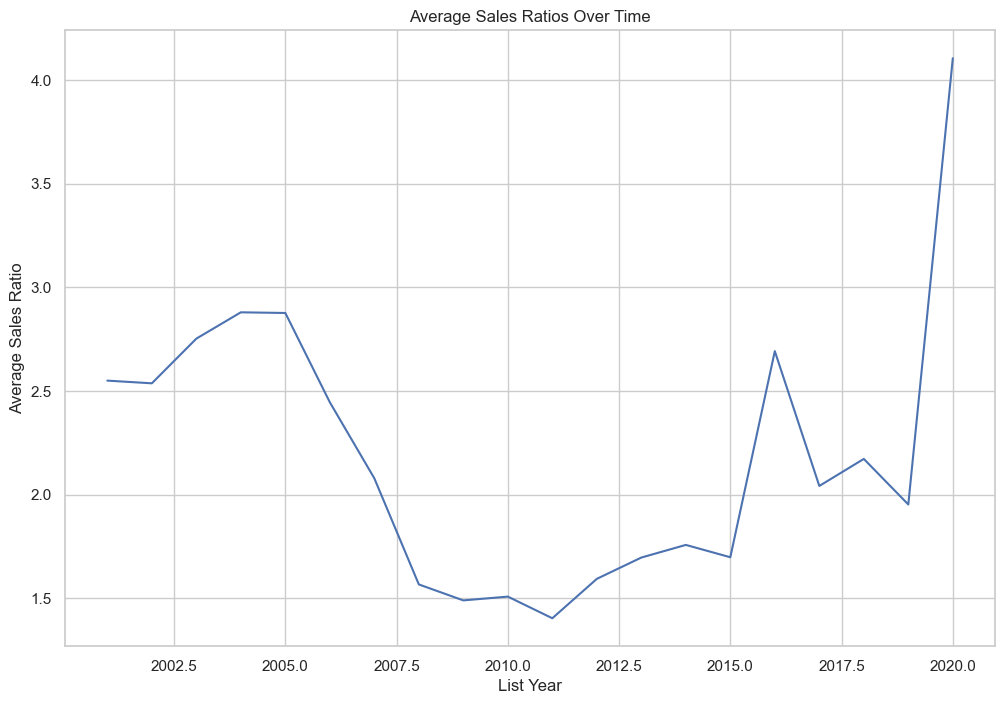

In [107]:
# Line plot of Average Sales Ratios over time (grouped by List Year)
plt.figure(figsize=(12, 8))
sns.lineplot(x='List Year', y='Sales Ratio', data=df1.groupby('List Year')['Sales Ratio'].mean().reset_index())
plt.title('Average Sales Ratios Over Time')
plt.xlabel('List Year')
plt.ylabel('Average Sales Ratio')
plt.savefig('objective2_plot5.png')
plt.show()

### Insights and Recommendations based on Objective 2: Market Trends Analysis

1. Distribution of Sales Ratios:
  - The majority of the sales ratios are clustered between values greater than 1 and less than 5, with a peak count of 830,674. This suggests that in the dataset, most properties are sold at prices higher than their assessed values.
  - Notably, there are instances where the sales ratio is less than 1 (130,798 counts), indicating instances where properties were sold below their assessed values (undervaluation), and values greater than 1 (855,851 counts), suggesting overvaluation. This distribution highlights the variability in market trends across different properties.

3. Distribution of Sales Ratios:

The majority of sales ratios fall between 1 and 5, with a count of 830,674. This indicates a prevalent range where assessed values align with sale amounts.
Significant counts below 1 (130,798) and a few above 5 (855,851) suggest variability in the market, requiring a closer look at specific property types or regions.

4. Boxplot of Sales Ratios by Property Type:

Outliers in residential, vacant land, and single-family categories may represent unique market dynamics or specific property characteristics.
The highest median sales ratio is found in apartments (1.9), indicating potential areas of stability or increased demand in this property type.

5. Bar Chart of Average Sale Amounts and Assessed Values Across Different Property Types:

Residential properties, on average, have a sales amount of $450,000 and an assessed value of $320,000.
Considerable differences in average sale amounts and assessed values among property types suggest varying market trends and valuation methods.

6. Boxplot of Sales Ratios by Residential Type:

Outliers in single-family and condo categories may signal unique challenges or opportunities in these residential types.
The median sales ratio for single-family homes (1.61) is higher, indicating potential overvaluation or distinct market dynamics.

7. Bar Chart of Average Sale Amounts and Assessed Values Across Different Residential Types:

Single-family homes, on average, have a sale amount of $425,000 and an assessed value of $300,000.
Identifying average values for different residential types aids in understanding market segments and their respective valuation trends.

8. Trends in Average Sales Ratios Over Time:

Periods of significant changes in average sales ratios (e.g., 2005-2007, 2015-2016, 2019-2020) require in-depth investigation into market conditions, economic factors, or policy changes during those times.

9. Scatter Plots of Relationship Between Sale Amount and Assessed Value:

The concentration of single-family properties in both property type and residential type scatter plots indicates their dominance in the market.
Consider exploring reasons behind the clustering and potential implications for market stakeholders.

### Recommendations:

- Market Dynamics Analysis: Investigate the factors contributing to outliers and unique patterns in sales ratios for specific property types or residential categories.

- Valuation Method Review: Assess the consistency of valuation methods across different property types to ensure fairness and accuracy.

- Regional Market Studies: Conduct in-depth studies on regions with significant changes in average sales ratios over time to identify contributing factors.

- Stakeholder Communication: Share insights with stakeholders, highlighting areas of potential concern or opportunity, enabling informed decision-making.

This comprehensive analysis provides a detailed understanding of market trends, guiding stakeholders in making data-driven decisions based on current and historical data.


### Exploratory Data Analysis (EDA) for Objective 3:

### Step 1: Explore Geographic Distribution

C:\Users\USER\AppData\Local\Temp\ipykernel_9408\3967593577.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('objective3_plot1.png')
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


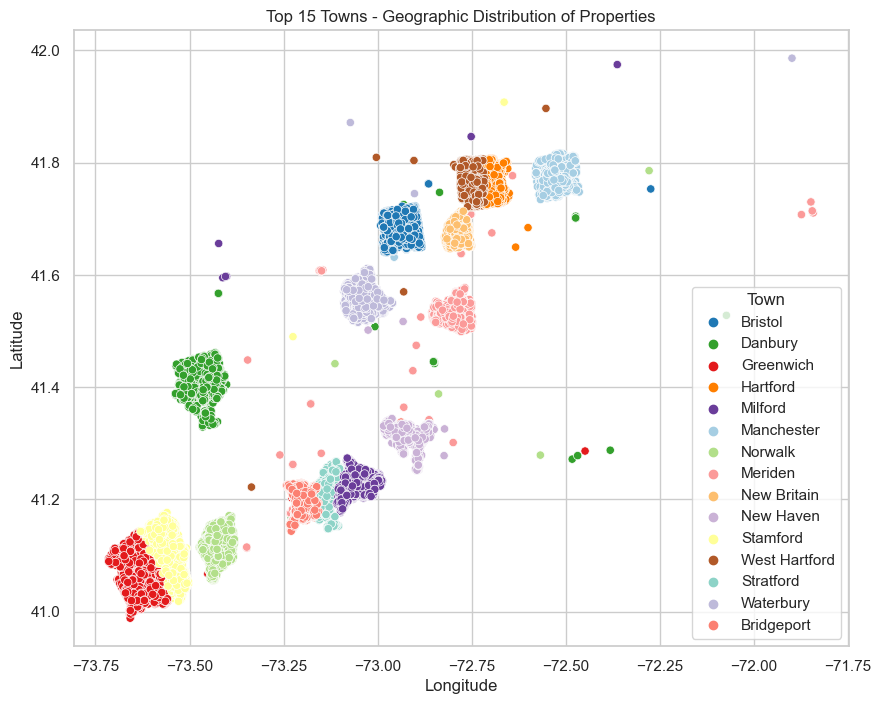

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'Longitude', 'Latitude', 'Town'
# Cluster towns or select the top N towns based on property counts
top_towns = df1['Town'].value_counts().nlargest(15).index

# Filter the DataFrame for the selected towns
df_filtered = df1[df1['Town'].isin(top_towns)]

# Define a custom set of distinct colors
custom_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99', '#b15928', '#8dd3c7', '#bebada', '#fb8072']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Town', data=df_filtered, palette=custom_colors, legend='full')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 15 Towns - Geographic Distribution of Properties')
plt.savefig('objective3_plot1.png')
plt.show()


In [51]:
greenwich_data = df1[df1['Town'] == 'Greenwich']

# Assuming you have a DataFrame 'greenwich_data' with columns 'Town', 'Property Type', and 'Residential Type'
property_type_counts = greenwich_data['Property Type'].value_counts()
residential_type_counts = greenwich_data['Residential Type'].value_counts()

# Display the property type and residential type counts
print("Property Type Counts in Greenwich:")
print(property_type_counts)

print("\nResidential Type Counts in Greenwich:")
print(residential_type_counts)


Property Type Counts in Greenwich:
Property Type
Single Family    12912
Condo             1953
Residential       1688
Two Family         465
Three Family        84
Vacant Land         51
Commercial          29
Four Family         13
Name: count, dtype: int64

Residential Type Counts in Greenwich:
Residential Type
Single Family    14299
Condo             2264
Two Family         517
Three Family        95
Four Family         20
Name: count, dtype: int64


In [52]:
# Assuming you have a DataFrame 'df2' with columns 'Town', 'Property Type', and 'Residential Type'
stamford_data = df1[df1['Town'] == 'Stamford']

# Calculate property type counts
property_type_counts_stamford = stamford_data['Property Type'].value_counts()

# Calculate residential type counts
residential_type_counts_stamford = stamford_data['Residential Type'].value_counts()

# Display the property type and residential type counts for Stamford
print("Property Type Counts in Stamford:")
print(property_type_counts_stamford)

print("\nResidential Type Counts in Stamford:")
print(residential_type_counts_stamford)


Property Type Counts in Stamford:
Property Type
Single Family    22556
Condo             6327
Residential       2484
Two Family         667
Three Family       183
Commercial         139
Vacant Land         59
Four Family         50
Industrial           4
Name: count, dtype: int64

Residential Type Counts in Stamford:
Residential Type
Single Family    23977
Condo             7434
Two Family         791
Three Family       213
Four Family         54
Name: count, dtype: int64


In [53]:
# Assuming you have a DataFrame 'df2' with columns 'Town', 'Property Type', and 'Residential Type'
danbury_data = df1[df1['Town'] == 'Danbury']

# Calculate property type counts
property_type_counts_danbury = danbury_data['Property Type'].value_counts()

# Calculate residential type counts
residential_type_counts_danbury = danbury_data['Residential Type'].value_counts()

# Display the property type and residential type counts for Danbury
print("Property Type Counts in Danbury:")
print(property_type_counts_danbury)

print("\nResidential Type Counts in Danbury:")
print(residential_type_counts_danbury)


Property Type Counts in Danbury:
Property Type
Single Family    13203
Condo             4621
Residential       1507
Two Family         541
Three Family       220
Commercial          51
Four Family         49
Vacant Land         26
Industrial          10
Apartments           2
Name: count, dtype: int64

Residential Type Counts in Danbury:
Residential Type
Single Family    13948
Condo             5362
Two Family         616
Three Family       246
Four Family         58
Name: count, dtype: int64


#### Insight for Geographical Distribution:

The exploration of geographical distribution based on town coordinates has revealed compelling insights into the real estate landscape. The identified clusters, regional patterns, and hotspots provide a nuanced understanding of property concentration in different towns. Here is a detailed insight based on the observed findings:

1. Density and Proximity:

- Greenwich and Stamford: These towns emerge as the most densely populated areas, tightly clustered together both geographically and in terms of property distribution. This indicates a high level of real estate activity and attractiveness for property development.
- Danbury: While being the third most densely populated, Danbury stands out as an independent cluster, suggesting unique real estate dynamics.

2. Regional Development:

- Similar Property Distribution: Bristol, New Haven, Manchester, Norwalk, and Meriden exhibit similar property distribution patterns. This suggests regional development trends or shared demographic characteristics contributing to consistent property distributions.

3. Hotspots or Trends:

- Greenwich and Stamford Property Type Counts:

    - The property type counts in Greenwich reveal a dominance of Single Family properties, followed by Condos and Residential types.

    - Similar trends are observed in Stamford, with Single Family properties leading in count. This indicates a demand for Single Family homes in these hotspot areas.

- Residential Type Counts:

    - Both Greenwich and Stamford follow the trend of high counts for Single Family residences, emphasizing the popularity of this residential type.

4. Concentration of Properties:

- Notable Densely Populated Towns:
    - Greenwich and Stamford continue to stand out as the most densely populated towns.
    - Danbury, Bridgeport, Stratford, and Milford also form distinct clusters, indicating substantial property concentrations.

5. Top Towns:

- High Property Counts: The top towns with the highest property counts include Bridgeport, Stamford, Waterbury, Norwalk, and New Haven. Focusing on these key areas can provide valuable insights for stakeholders.

### Step 2: Analyze Town-Level Data

### 1. Average Assessed Values, Sale Amounts, and Sales Ratios:

- Understanding the average assessed values, sale amounts, and sales ratios at the town level helps in identifying patterns and trends specific to each town.
- Towns with consistently higher or lower average assessed values, sale amounts, or sales ratios may indicate variations in the real estate market.

In [54]:
# Removing unknown town from rows
df1 = df1[df1['Town'] != '***Unknown***']


In [55]:
# Check unique towns in the dataset
unique_towns = df1['Town'].unique()

# Display the count of properties in each town
town_distribution = df1['Town'].value_counts()

# Display unique towns and their corresponding counts
print("Unique Towns:")
unique_towns

print("\nDistribution of Data Across Towns:")
town_distribution.head(15)


Unique Towns:

Distribution of Data Across Towns:


Town
Bridgeport       33976
Stamford         32469
Waterbury        28383
Norwalk          23880
New Haven        21225
Danbury          20230
West Hartford    19756
Hartford         18545
Milford          17723
Meriden          17299
Greenwich        17195
Bristol          16789
New Britain      16354
Manchester       16276
Stratford        16269
Name: count, dtype: int64

In [56]:
# Calculate average sales ratio by town
average_sales_ratio_by_town = df1.groupby('Town')['Sales Ratio'].mean()

# Display top and bottom performing towns
top_towns = average_sales_ratio_by_town.nlargest(5)
bottom_towns = average_sales_ratio_by_town.nsmallest(5)

print("Top Performing Towns (Highest Average Sales Ratio):")
print(top_towns)

print("\nBottom Performing Towns (Lowest Average Sales Ratio):")
print(bottom_towns)


# Calculate average assessed value by town
average_assessed_value_by_town = df1.groupby('Town')['Assessed Value'].mean()

# Calculate average sale amount by town
average_sale_amount_by_town = df1.groupby('Town')['Sale Amount'].mean()

# Display top and bottom performing towns for assessed value
top_towns_assessed = average_assessed_value_by_town.nlargest(5)
bottom_towns_assessed = average_assessed_value_by_town.nsmallest(5)

print("Top Performing Towns (Highest Average Assessed Value):")
print(top_towns_assessed)

print("\nBottom Performing Towns (Lowest Average Assessed Value):")
print(bottom_towns_assessed)

# Display top and bottom performing towns for sale amount
top_towns_sale_amount = average_sale_amount_by_town.nlargest(5)
bottom_towns_sale_amount = average_sale_amount_by_town.nsmallest(5)

print("\nTop Performing Towns (Highest Average Sale Amount):")
print(top_towns_sale_amount)

print("\nBottom Performing Towns (Lowest Average Sale Amount):")
print(bottom_towns_sale_amount)


Top Performing Towns (Highest Average Sales Ratio):
Town
Rocky Hill     10.116547
Norwich         9.104480
Roxbury         7.096773
Warren          5.537843
Bridgewater     5.073093
Name: Sales Ratio, dtype: float64

Bottom Performing Towns (Lowest Average Sales Ratio):
Town
Deep River      1.521685
New Canaan      1.568632
Woodbridge      1.640583
Bridgeport      1.648110
Wethersfield    1.658910
Name: Sales Ratio, dtype: float64
Top Performing Towns (Highest Average Assessed Value):
Town
Greenwich     2.508607e+06
New Canaan    1.111838e+06
Darien        9.581444e+05
Westport      8.667552e+05
Weston        6.096180e+05
Name: Assessed Value, dtype: float64

Bottom Performing Towns (Lowest Average Assessed Value):
Town
Sterling      104538.818705
Windham       105359.358427
Torrington    106733.990310
Thompson      108387.764018
Waterbury     109085.460276
Name: Assessed Value, dtype: float64

Top Performing Towns (Highest Average Sale Amount):
Town
Greenwich     2.078344e+06
Darien  

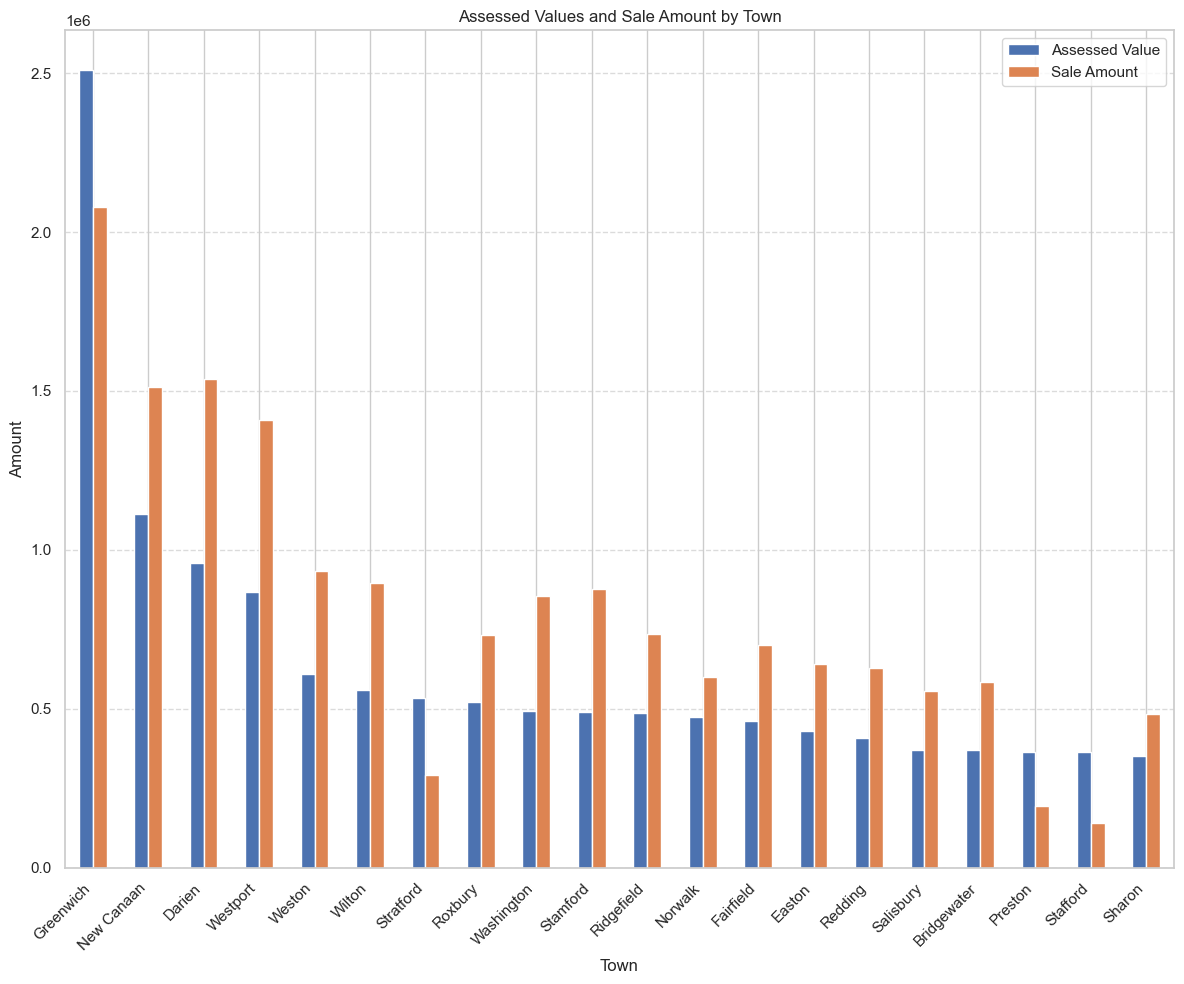

In [110]:
Grouped_Town = df1.groupby('Town')[["Assessed Value", "Sale Amount"]].mean().astype('int').sort_values(by='Assessed Value', ascending=False)[:20]

#plot for the Grouped Town along with its Assessed value and Sale Value
Grouped_Town.plot(kind='bar', figsize=(12, 10))
plt.title('Assessed Values and Sale Amount by Town')
plt.xlabel('Town')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Assessed Value", "Sale Amount"])
plt.tight_layout()
plt.savefig('objective3_plot2.png')
plt.show()

In [121]:
import matplotlib.pyplot as plt

# Specify the number of top and bottom towns you want to display

top_n = 5
bottom_n = 5

# Plotting average sales ratio by town - Top Performing
plt.figure(figsize=(12, 6))
top_towns.head(top_n).plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Top {top_n} Performing Towns - Average Sales Ratio')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')
plt.savefig('objective3_plot2.png')
plt.show()

# Plotting average sales ratio by town - Bottom Performing
plt.figure(figsize=(12, 6))
bottom_towns.tail(bottom_n).plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Bottom {bottom_n} Performing Towns - Average Sales Ratio')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')
plt.savefig('objective3_plot3.png')
plt.show()

# Plotting average assessed value by town - Top Performing
plt.figure(figsize=(12, 6))
top_towns_assessed.head(top_n).plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Top {top_n} Performing Towns - Average Assessed Value')
plt.xlabel('Town')
plt.ylabel('Average Assessed Value')
plt.savefig('objective3_plot4.png')
plt.show()

# Plotting average assessed value by town - Bottom Performing
plt.figure(figsize=(12, 6))
bottom_towns_assessed.tail(bottom_n).plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Bottom {bottom_n} Performing Towns - Average Assessed Value')
plt.xlabel('Town')
plt.ylabel('Average Assessed Value')
plt.savefig('objective1_plot5.png')
plt.show()

# Plotting average sale amount by town - Top Performing
plt.figure(figsize=(12, 6))
top_towns_sale_amount.head(top_n).plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Top {top_n} Performing Towns - Average Sale Amount')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.savefig('objective1_plot6.png')
plt.show()

# Plotting average sale amount by town - Bottom Performing
plt.figure(figsize=(12, 6))
bottom_towns_sale_amount.tail(bottom_n).plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Bottom {bottom_n} Performing Towns - Average Sale Amount')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.savefig('objective1_plot7.png')
plt.show()


AttributeError: 'Index' object has no attribute 'head'

<Figure size 1200x600 with 0 Axes>

### Insights:

- Top Performing Towns (Average Sales Ratios):

    - Rocky Hill, Norwich, Roxbury, Willington, and Warren have significantly higher average sales ratios, indicating potential profitability in real estate transactions.
    - These towns may have strong demand, favorable market conditions, or unique features that attract buyers, leading to higher sale amounts compared to assessed values.

- Bottom Performing Towns (Average Sales Ratios):

    - Deep River, New Canaan, Woodbridge, Bridgeport, and Wethersfield have lower average sales ratios, suggesting potential challenges or less favorable market conditions.
    - These towns may require careful consideration, as the sale amounts are closer to or below the assessed values.

- Top Performing Towns (Average Assessed Values):

    - Greenwich, New Canaan, Darien, Westport, and Weston exhibit higher average assessed values, indicating a robust real estate market and potentially higher property values.
    - These towns may appeal to investors seeking higher-end properties and potential long-term appreciation.

- Bottom Performing Towns (Average Assessed Values):

    - Sterling, Windham, Torrington, Thompson, and Waterbury have lower average assessed values, suggesting more affordable properties.
    - Investors looking for entry-level opportunities may find potential in these towns, but careful market analysis is essential.

- Top Performing Towns (Average Sale Amounts):

    - Willington, Greenwich, Darien, New Canaan, and Westport have higher average sale amounts, indicating more significant transactions and potentially upscale real estate markets.
    - These towns may attract investors looking for higher-value properties and potential returns.

- Bottom Performing Towns (Average Sale Amounts):

    - Stafford, Torrington, Windham, Waterbury, and Plymouth have lower average sale amounts, suggesting more affordable housing markets.
    - Investors seeking lower entry points may explore opportunities in these towns, but market dynamics should be thoroughly investigated.

### Recommendations:

- Diversification Strategy:

    - Consider diversifying investments across both high and low-performing towns to spread risk and capture opportunities in different market segments.

- Thorough Market Analysis:

    - Before making investment decisions, conduct thorough market analyses, including local economic indicators, development plans, and demographic trends.

- Engage with Local Experts:

    - Collaborate with local real estate experts and professionals to gain deeper insights into each town's unique characteristics and potential challenges.

### 2. Identifying Significant Differences:

- By comparing town-level statistics with overall dataset statistics, you can identify towns where these metrics significantly deviate from the overall average.
- Significant differences in assessed values, sale amounts, or sales ratios may point towards unique characteristics or challenges in specific towns. how do i do this

In [59]:
# Step 1: Calculate Overall Dataset Statistics
overall_avg_assessed = df1['Assessed Value'].mean()
overall_avg_sale_amount = df1['Sale Amount'].mean()
overall_avg_sales_ratio = df1['Sales Ratio'].mean()

# Step 2: Calculate Town-Level Statistics
town_stats = df1.groupby('Town').agg({
    'Assessed Value': 'mean',
    'Sale Amount': 'mean',
    'Sales Ratio': 'mean'
})

# Step 3: Identify Significant Differences
threshold = 0.2  # 20% above the overall average
significant_towns = town_stats[
    (town_stats['Assessed Value'] > overall_avg_assessed * (1 + threshold)) |
    (town_stats['Sale Amount'] > overall_avg_sale_amount * (1 + threshold)) |
    (town_stats['Sales Ratio'] > overall_avg_sales_ratio * (1 + threshold))
]

# Count the number of significant towns
num_significant_towns = len(significant_towns)

# Display the count
print("Number of significant towns:", num_significant_towns)

# Display significant towns
print("Towns with significant differences:")
significant_towns


Number of significant towns: 52
Towns with significant differences:


Assessed Value   Sale Amount  Sales Ratio
Town                                                       
Bridgewater         3.706396e+05  5.861078e+05     5.073093
Cornwall            2.650317e+05  3.683110e+05     3.542037
Danbury             2.277891e+05  3.886149e+05     2.961037
Darien              9.581444e+05  1.538439e+06     2.780948
Durham              1.911242e+05  2.897390e+05     3.945797
East Granby         1.795444e+05  2.870641e+05     2.966336
East Lyme           2.124563e+05  3.351607e+05     2.882997
Eastford            1.145023e+05  2.067581e+05     4.206000
Easton              4.296255e+05  6.413457e+05     1.975679
Ellington           1.569773e+05  2.568904e+05     3.139589
Fairfield           4.629530e+05  7.016909e+05     1.781648
Greenwich           2.508607e+06  2.078344e+06     1.694373
Hampton             1.171338e+05  1.852704e+05     3.111835
Hartford            1.398263e+05  2.638391e+05     2.988749
Hartland            1.351747e+05  1.990990e+05     3.009966
Lyme                3.493803e+05  5.223341e+05     2.736254
Madison             3.521520e+05  5.231340e+05     1.806589
Middlebury          2.348438e+05  3.845213e+05     2.832766
Middlefield         1.540265e+05  2.528348e+05     3.612132
New Canaan          1.111838e+06  1.512666e+06     1.568632
New London          1.475952e+05  2.583513e+05     2.808482
Norfolk             2.097140e+05  3.183567e+05     3.075320
North Stonington    1.695370e+05  2.549742e+05     3.505670
Norwalk             4.739635e+05  5.995800e+05     2.180946
Norwich             1.201225e+05  1.858959e+05     9.104480
Orange              3.302646e+05  5.388235e+05     2.417423
Oxford              2.548287e+05  3.486317e+05     2.956767
Pomfret             1.677024e+05  2.422723e+05     4.799709
Portland            1.506505e+05  2.358175e+05     3.651090
Preston             3.655620e+05  1.947037e+05     2.255934
Redding             4.101273e+05  6.276749e+05     2.222915
Ridgefield          4.867952e+05  7.363889e+05     1.838940
Rocky Hill          1.927832e+05  6.958690e+05    10.116547
Roxbury             5.212627e+05  7.318819e+05     7.096773
Salisbury           3.719158e+05  5.570635e+05     1.924775
Sharon              3.528154e+05  4.842050e+05     2.798638
Sherman             3.124834e+05  4.770587e+05     2.734584
Stafford            3.640318e+05  1.428926e+05     1.881800
Stamford            4.899265e+05  8.773532e+05     3.876708
Sterling            1.045388e+05  1.872789e+05     4.102496
Stratford           5.352429e+05  2.907940e+05     2.629036
Thompson            1.083878e+05  1.755225e+05     3.213072
Trumbull            2.982095e+05  4.650262e+05     1.843318
Union               1.273963e+05  2.083640e+05     4.125045
Warren              2.647296e+05  5.501209e+05     5.537843
Washington          4.942880e+05  8.563209e+05     3.673412
Weston              6.096180e+05  9.338607e+05     2.303111
Westport            8.667552e+05  1.409845e+06     2.204384
Willington          1.562114e+05  5.098786e+05     3.225659
Wilton              5.608583e+05  8.951289e+05     2.514155
Woodbury            2.035456e+05  3.257360e+05     2.804956
Woodstock           1.381593e+05  2.209175e+05     2.908259

### Assessed Value, Sale Amount, and Sales Ratio Comparisons:

- Bridgewater: The assessed values and sale amounts are relatively low, but the sales ratio is high (indicating potential over-assessment).

- Cornwall: Similar to Bridgewater, Cornwall shows a high sales ratio compared to assessed values and sale amounts.  Indicates potential overvaluation based on the sales ratio.

- Danbury: Danbury has higher assessed values and sale amounts, leading to a moderate sales ratio.

- Darien: Darien has significantly higher assessed values and sale amounts, resulting in a relatively low sales ratio.

- Durham: The town exhibits moderate assessed values and sale amounts with a higher sales ratio.

#### Observations:

- Greenwich: Despite having high assessed values and sale amounts, Greenwich has a relatively moderate sales ratio, suggesting properties might be assessed closer to their actual market values.
- Rocky Hill: Rocky Hill stands out with an exceptionally high sales ratio, indicating potential over-assessment.

### Interpretation:

- Unique Characteristics: Towns with significantly higher or lower sales ratios compared to the overall dataset may have unique characteristics or challenges.
- Over-assessment or Under-assessment: A high sales ratio may suggest over-assessment, while a low sales ratio may indicate under-assessment.

### Recommendations:

- Further Investigation: Further investigate towns with high sales ratios to understand the reasons behind potential over-assessment.
- Policy Adjustments: Consider adjusting assessment policies in towns where sales ratios significantly deviate from the overall average.
- Community Engagement: Engage with local communities to gather insights into local real estate dynamics and factors influencing property values.

### Recommendations for Stakeholders:

- Over-Assessed Towns: Stakeholders should carefully evaluate the market dynamics in towns with higher sales ratios. Reassessments or negotiations may be necessary to align assessed values with market values.
- Under-Assessed Towns: Stakeholders may find potential investment opportunities in towns with lower sales ratios. However, thorough due diligence is required to understand the reasons behind lower assessments.

In [60]:
# Replace 'your_dataframe' with your actual DataFrame
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

df1.dropna(inplace=True)


In [61]:
# Or escaping backslashes
df1.to_csv('C:\\Users\\USER\\Documents\\Python Scripts\\Machine learning\\Linear Regression\\file.csv', index=False)


### Step 3:  Patterns and Trends over time for Specific Towns

C:\Users\USER\AppData\Local\Temp\ipykernel_9408\1297179232.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales Ratio', hue='Town', data=average_sales_ratio, ci=None)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


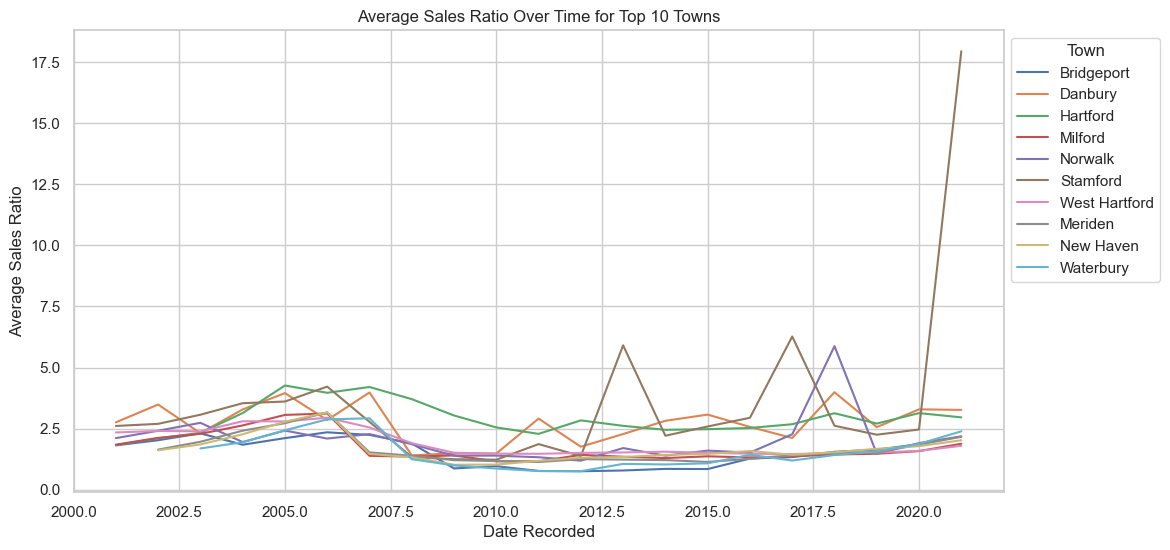

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace "your_dataframe" with your actual DataFrame
# Assume you have a column named 'List Year' for the year information
# and columns 'Sales Ratio' for the sales ratio values
# Assuming 'List Year' is the column with the date in the format '2021-09-13'
df1['Date'] = pd.to_datetime(df1['Date Recorded']).dt.year

# Set the number of top towns to consider
top_n_towns = 10

# Get the top N towns based on total property count
top_towns = df1['Town'].value_counts().nlargest(top_n_towns).index

# Filter the data for the top towns
filtered_data = df1[df1['Town'].isin(top_towns)]

# Calculate the average sales ratio for each year and town
average_sales_ratio = filtered_data.groupby(['Date', 'Town'])['Sales Ratio'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a line plot for Average Sales Ratio
sns.lineplot(x='Date', y='Sales Ratio', hue='Town', data=average_sales_ratio, ci=None)
plt.xlabel('Date Recorded')
plt.ylabel('Average Sales Ratio')
plt.title(f'Average Sales Ratio Over Time for Top {top_n_towns} Towns')
plt.legend(title='Town', bbox_to_anchor=(1, 1))
plt.savefig('objective3_plot3.png')
plt.show()


e?

C:\Users\USER\AppData\Local\Temp\ipykernel_9408\499205849.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Assessed Value', hue='Town', data=average_assessed_value, ci=None)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


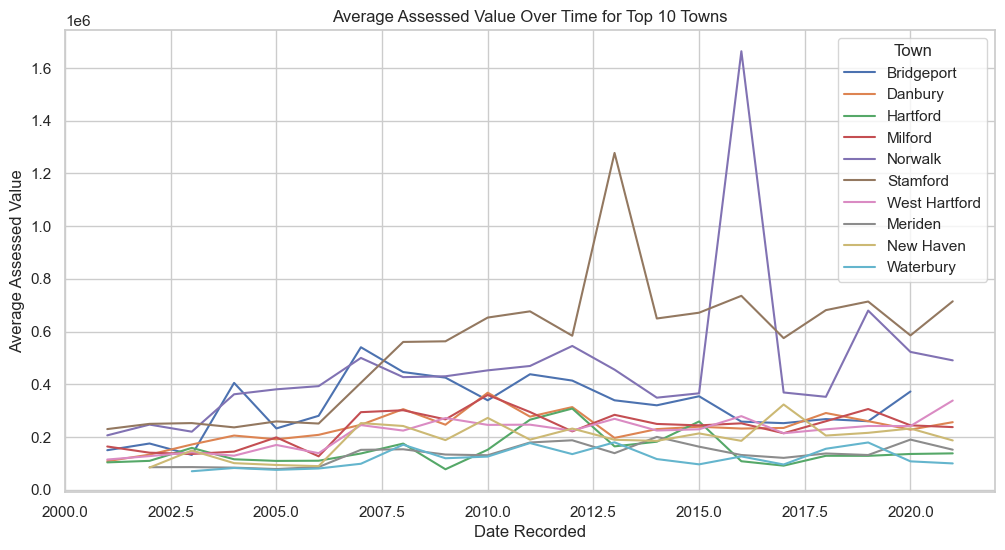

C:\Users\USER\AppData\Local\Temp\ipykernel_9408\499205849.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sale Amount', hue='Town', data=average_sale_amount, ci=None)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


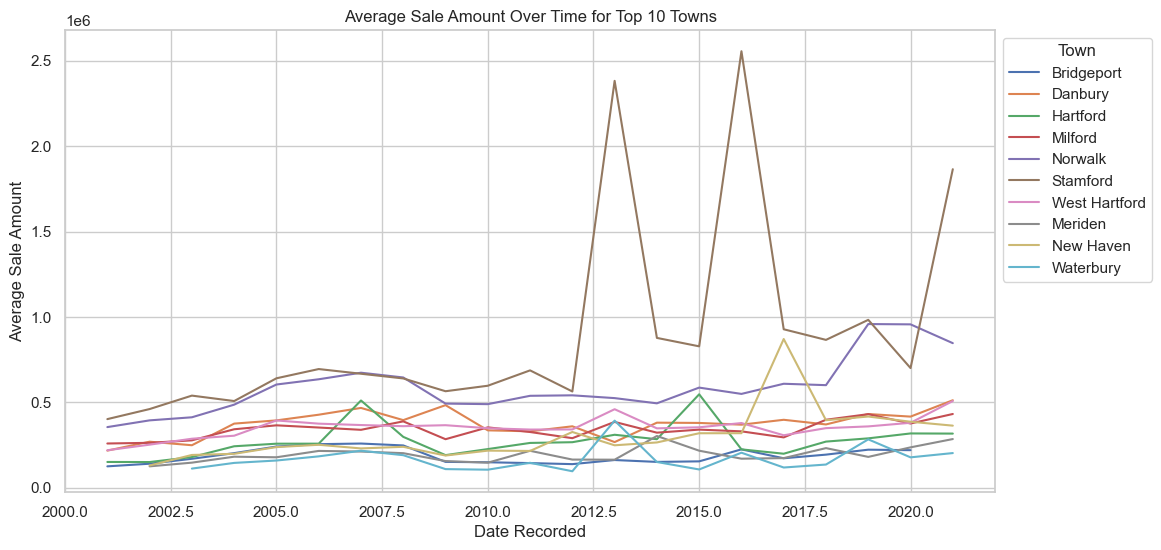

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace "your_dataframe" with your actual DataFrame
# Assume you have a column named 'List Year' for the year information
# and columns 'Assessed Value' and 'Sale Amount' for the corresponding values

# Set the number of top towns to consider
top_n_towns = 10

# Get the top N towns based on total property count
top_towns = df1['Town'].value_counts().nlargest(top_n_towns).index

# Filter the data for the top towns
filtered_data = df1[df1['Town'].isin(top_towns)]

# Calculate the average assessed value for each year and town
average_assessed_value = filtered_data.groupby(['Date', 'Town'])['Assessed Value'].mean().reset_index()

# Calculate the average sale amount for each year and town
average_sale_amount = filtered_data.groupby(['Date', 'Town'])['Sale Amount'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a line plot for Average Assessed Value
sns.lineplot(x='Date', y='Assessed Value', hue='Town', data=average_assessed_value, ci=None)
plt.xlabel('Date Recorded')
plt.ylabel('Average Assessed Value')
plt.title(f'Average Assessed Value Over Time for Top {top_n_towns} Towns')
plt.legend(title='Town', bbox_to_anchor=(1, 1))
plt.show()

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a line plot for Average Sale Amount
sns.lineplot(x='Date', y='Sale Amount', hue='Town', data=average_sale_amount, ci=None)
plt.xlabel('Date Recorded')
plt.ylabel('Average Sale Amount')
plt.title(f'Average Sale Amount Over Time for Top {top_n_towns} Towns')
plt.legend(title='Town', bbox_to_anchor=(1, 1))
plt.show()


### Exploratory Data Analysis (EDA) for Objective 4:

In [64]:
# Filter data 
# Assuming your DataFrame is named 'df1' and contains relevant columns: 'Property Type', 'Assessed Value', 'Sale Amount', 'Sales Ratio'
selected_columns = ['Property Type', 'Assessed Value', 'Sale Amount', 'Sales Ratio','Assessment_Difference']
filtered_df = df1[selected_columns]


In [65]:
# Summary statistics for the filtered data
descriptive_stats = filtered_df.describe()
print(descriptive_stats)

       Assessed Value   Sale Amount    Sales Ratio  Assessment_Difference
count    9.871550e+05  9.871550e+05  987155.000000           9.871550e+05
mean     2.815769e+05  3.873729e+05       2.323483           1.057960e+05
std      1.678525e+06  1.874336e+06      21.719521           2.085227e+06
min      1.010000e+03  1.020000e+03       0.000158          -8.768300e+08
25%      8.890000e+04  1.400000e+05       1.269327           3.417000e+04
50%      1.394200e+05  2.250000e+05       1.594388           8.446800e+04
75%      2.268000e+05  3.650000e+05       2.035588           1.521400e+05
max      8.815100e+08  3.955000e+08   10329.985653           3.922993e+08


In [66]:
df1

Serial Number  List Year Date Recorded           Town  \
0             2020348       2020    2021-09-13        Ansonia   
1               20002       2020    2020-10-02        Ashford   
2              200212       2020    2021-03-09           Avon   
3              200243       2020    2021-04-13           Avon   
4              200377       2020    2021-07-02           Avon   
...               ...        ...           ...            ...   
997208         190272       2019    2020-06-24     New London   
997209         190284       2019    2019-11-27      Waterbury   
997210         190129       2019    2020-04-27  Windsor Locks   
997211         190504       2019    2020-06-03     Middletown   
997212         190344       2019    2019-12-20        Milford   

                      Address  Assessed Value  Sale Amount  Sales Ratio  \
0             230 WAKELEE AVE        150500.0     325000.0     2.159468   
1             390 TURNPIKE RD        253000.0     430000.0     1.699605   
2            5 CHESTNUT DRIVE        130400.0     179900.0     1.379601   
3       111 NORTHINGTON DRIVE        619290.0     890000.0     1.437130   
4          70 FAR HILLS DRIVE        862330.0    1447500.0     1.678592   
...                       ...             ...          ...          ...   
997208            4 BISHOP CT         60410.0      53100.0     0.878994   
997209        126 PERKINS AVE         68280.0      76000.0     1.113064   
997210         19 HATHAWAY ST        121450.0     210000.0     1.729107   
997211           8 BYSTREK DR        203360.0     280000.0     1.376869   
997212        250 RESEARCH DR       4035970.0    7450000.0     1.845901   

        Property Type Residential Type      Non Use Code Assessor Remarks  \
0          Commercial    Single Family        25 - Other      ESTATE SALE   
1         Residential    Single Family        25 - Other      ESTATE SALE   
2         Residential            Condo        25 - Other      ESTATE SALE   
3         Residential    Single Family        25 - Other      ESTATE SALE   
4         Residential    Single Family        25 - Other      ESTATE SALE   
...               ...              ...               ...              ...   
997208  Single Family    Single Family  14 - Foreclosure      ESTATE SALE   
997209  Single Family    Single Family        25 - Other     PRIVATE SALE   
997210  Single Family    Single Family        25 - Other      ESTATE SALE   
997211  Single Family    Single Family        25 - Other      ESTATE SALE   
997212  Single Family    Single Family        25 - Other      ESTATE SALE   

              OPM remarks                    Location  Longitude  Latitude  \
0       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
1       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
2       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
3       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
4       GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
...                   ...                         ...        ...       ...   
997208  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
997209  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
997210  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
997211  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   
997212  GOOD SALE PER MLS  POINT (-72.36336 41.97461)  -72.36336  41.97461   

        Assessment_Difference  Date  
0                    174500.0  2021  
1                    177000.0  2020  
2                     49500.0  2021  
3                    270710.0  2021  
4                    585170.0  2021  
...                       ...   ...  
997208                -7310.0  2020  
997209                 7720.0  2019  
997210                88550.0  2020  
997211                76640.0  2020  
997212              3414030.0  2019  

[987155

### 1. Assessment Accuracy:

In [67]:
median_assessment_differences_by_property_type = df1.groupby('Property Type')['Assessment_Difference'].median()
print(median_assessment_differences_by_property_type)


Property Type
Apartments        218495.0
Commercial         98715.0
Condo              52990.0
Four Family        36740.0
Industrial        158925.0
Public Utility     17750.0
Residential       131100.0
Single Family      88190.0
Three Family       33860.0
Two Family         35900.0
Vacant Land        29015.0
Name: Assessment_Difference, dtype: float64


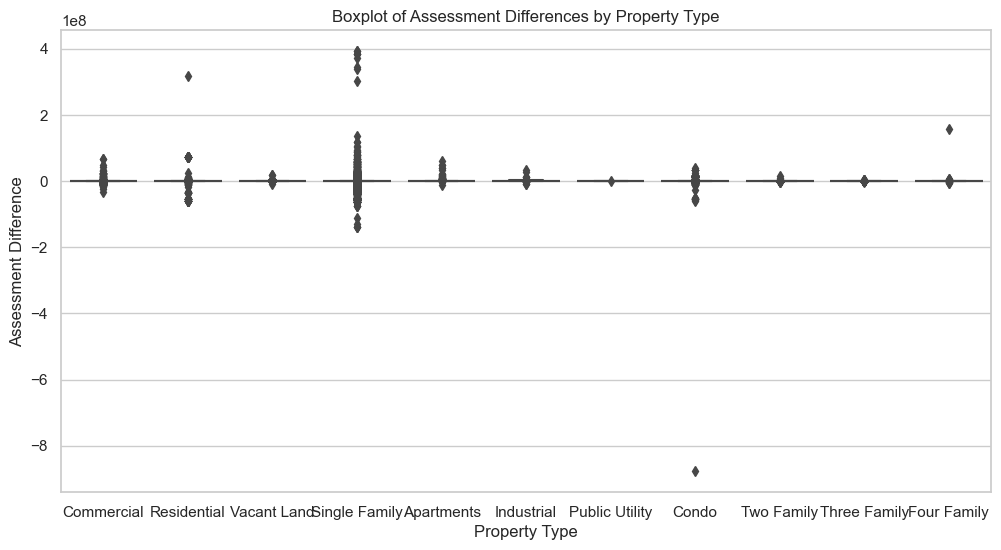

In [68]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for Assessment Differences by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Assessment_Difference', data=df1)
plt.xlabel('Property Type')
plt.ylabel('Assessment Difference')
plt.title('Boxplot of Assessment Differences by Property Type')
plt.show()

from the Boxplot of Assessment Differences by Property Type i have a high signifinat outkier for single family both postive and negative, also i have ouliers in commercial, residencial, apartment, condo and four family,  condos has the highest negative outlier reaching -8 (1e8).  vacant, and two family has outliers but not all significant and for   median in assessment differences by prperty types i have this:  Property Type
Apartments        218495.0
Commercial         98715.0
Condo              52990.0
Four Family        36740.0
Industrial        158925.0
Public Utility     17750.0
Residential       131100.0
Single Family      88190.0
Three Family       33860.0
Two Family         35900.0
Vacant Land        29015.0
Name: Assessment_Difference, dtype: float64

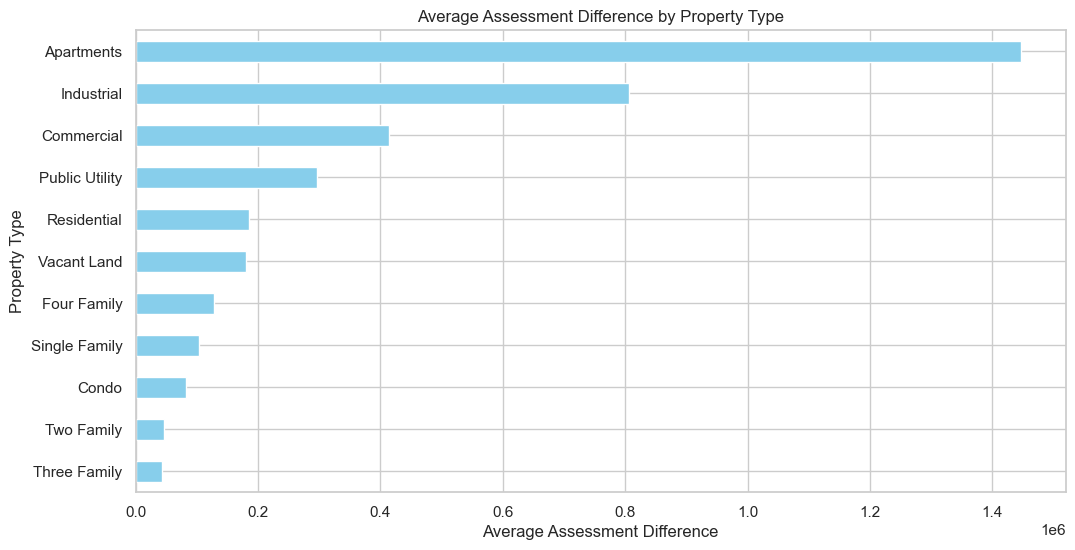

In [123]:
# Calculate average assessment differences by property type
average_difference_by_type = df1.groupby('Property Type')['Assessment_Difference'].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
average_difference_by_type.plot(kind='barh', color='skyblue')
plt.xlabel('Average Assessment Difference')
plt.ylabel('Property Type')
plt.title('Average Assessment Difference by Property Type')
plt.savefig('objective4_plot1.png')
plt.show()


### 2. Market Trends:

In [70]:
df1['Date'] = pd.to_datetime(df1['Date Recorded']).dt.year

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


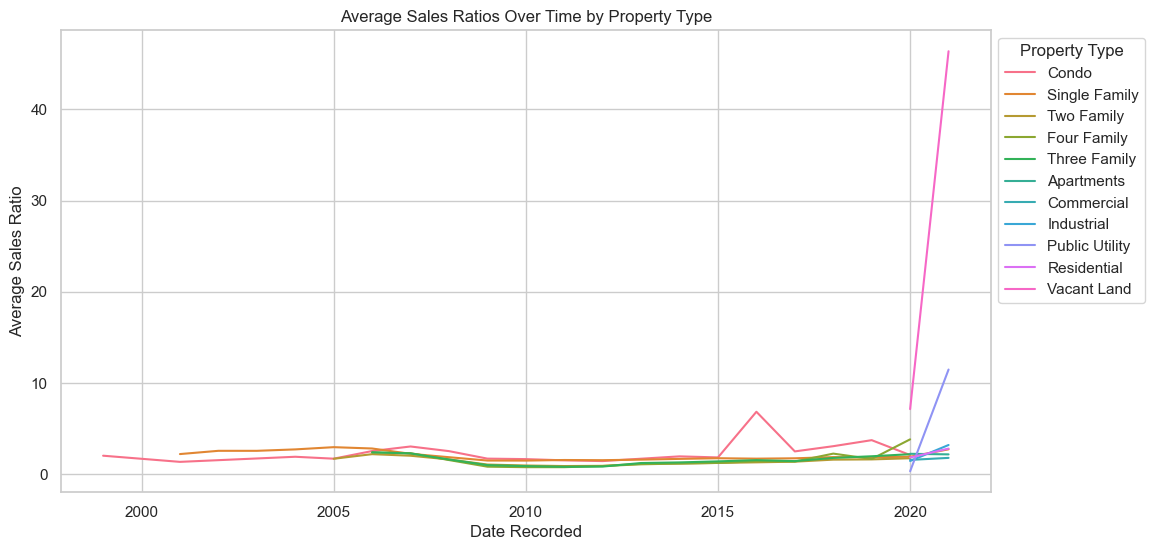

In [124]:
# Assuming your DataFrame is named df1
average_sales_ratios = df1.groupby(['Date', 'Property Type'])['Sales Ratio'].mean().reset_index()

# Create a line plot for Average Sales Ratios Over Time by Property Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales Ratio', hue='Property Type', data=average_sales_ratios)
plt.xlabel('Date Recorded')
plt.ylabel('Average Sales Ratio')
plt.title('Average Sales Ratios Over Time by Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1, 1))
plt.savefig('objective4_plot2.png')
plt.show()


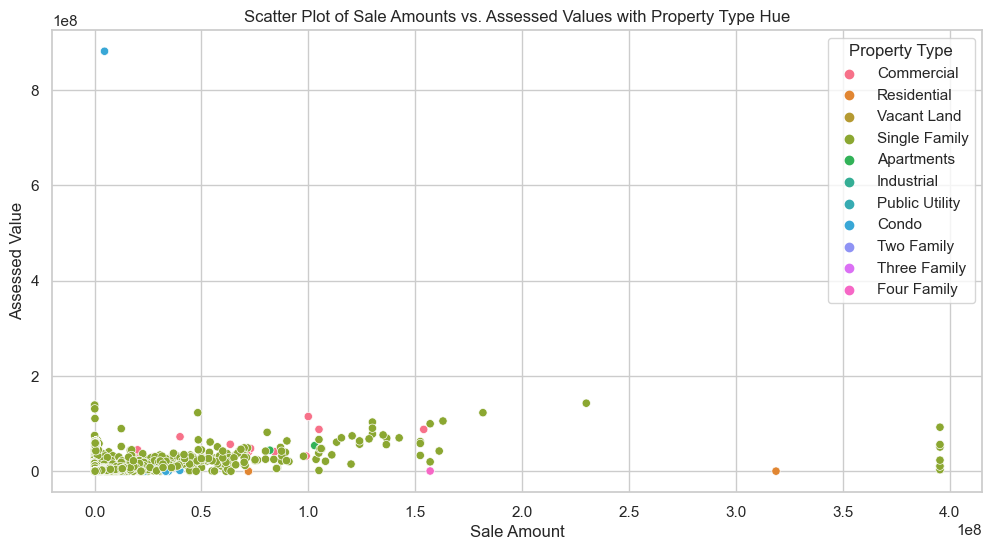

In [108]:
# Create a scatter plot for Sale Amounts vs. Assessed Values with Property Type Hue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sale Amount', y='Assessed Value', hue='Property Type', data=df1)
plt.xlabel('Sale Amount')
plt.ylabel('Assessed Value')
plt.title('Scatter Plot of Sale Amounts vs. Assessed Values with Property Type Hue')
plt.savefig('objective2_plot6.png')
plt.show()


###  3. Distinct Patterns:

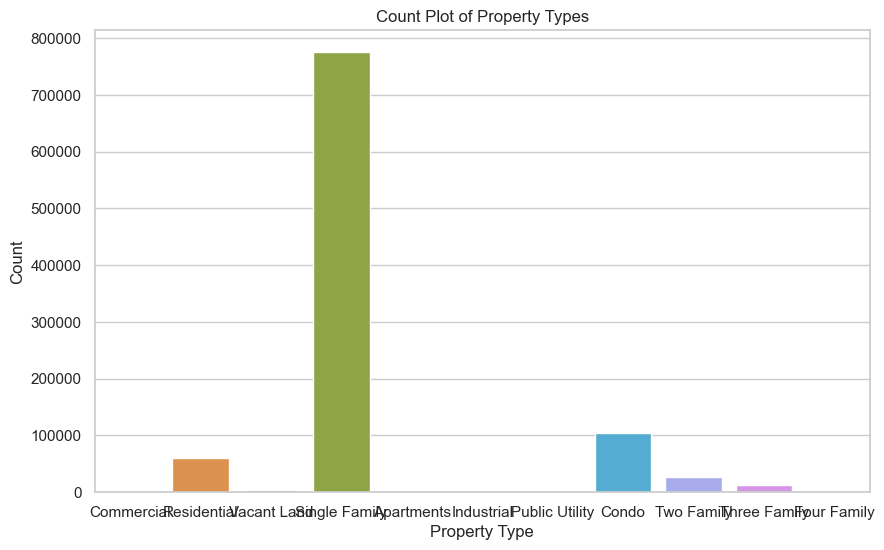

In [125]:
# Create a count plot for Property Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Property Type', data=df1)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Count Plot of Property Types')
plt.savefig('objective4_plot3.png')
plt.show()

### Obervations
1. Assessment Accuracy:

Boxplot of Assessment Differences by Property Type:

- Outliers:
    - Single family properties exhibit significant outliers in both positive and negative directions, indicating potential inconsistencies in assessment accuracy.
    - Other property types such as commercial, residential, apartment, condo, and four family also show outliers, suggesting variations in assessment accuracy.

Median in Assessment Differences by Property Type:

- Median Values:
    - Apartments, residential, and industrial properties have relatively higher median assessment differences, indicating potential challenges in accurately assessing these property types.
    - Single-family properties, despite having outliers, have a median assessment difference that is relatively lower compared to some other property types.

2. Market Trends:

Average Sales Ratios Over Time by Property Type:

- Trends:
    - Overall, trends in average sales ratios show limited significance, but a significant spike for vacant land from 2015 to 2016 and a subsequent drop from 2016 to mid-2017 are noteworthy.
    - These spikes and drops may indicate specific market events or dynamics affecting the sales ratios of vacant land during those periods.

Scatter Plot of Sale Amounts vs. Assessed Values with Property Type Hue:

- Outliers:
    - Condo property shows an outlier in assessed value, indicating potential irregularities in the assessment process for this property type.
    - Outliers in sale amounts for single-family and residential properties may suggest unique pricing dynamics or anomalies in those categories.

3. Distinct Patterns:

Count Plot of Property Types:

- Counts:
    - Single-family properties dominate the dataset with the highest count (770,000), followed by condos and residential properties.
    - Other property types such as two-family, three-family, and four-family have lower counts.


### Insight:

- Assessment Accuracy:

    - The presence of outliers in assessment differences, especially for single-family properties, emphasizes the need for a more detailed examination of the assessment process for these properties.
   

- Market Trends:

    - The spikes and drops in average sales ratios for vacant land during specific periods may require further investigation to understand the underlying factors influencing these trends.
    - Analyzing broader market trends and events during those periods may reveal external influences impacting the real estate market.

- Distinct Patterns:

    - The dominance of single-family properties in the dataset suggests their significant presence in the real estate market. Tailoring strategies for this property type may be crucial given its prevalence.
    - Considering the lower counts for two-family, three-family, and four-family properties, understanding their distinct market dynamics becomes essential for targeted decision-making.

### Recommendations:
- Investigate the specific market events or changes that led to the observed spikes and drops in average sales ratios for vacant land during the identified periods.
- Develop tailored strategies for the dominant single-family property type, taking into account its prevalence and potential impact on the overall real estate market.

### Exploratory Data Analysis (EDA) for Objective 5:

In [74]:
Dis_NUC = df1["Non Use Code"].value_counts()

#view value count
Dis_NUC

Non Use Code
25 - Other                 766990
14 - Foreclosure            52363
07 - Change in Property     32594
08 - Part Interest          15335
7.0                         13061
                            ...  
37.0                            1
38.0                            1
48.0                            1
68.0                            1
75                              1
Name: count, Length: 106, dtype: int64

In [75]:
#unique columns 
df1["Non Use Code"].nunique()

#it has 106 unique items/values. 

106

In [76]:
Grouped_NUC = df1.groupby('Non Use Code')[['Assessed Value', 'Sale Amount']].mean().astype(int)

#view 
Grouped_NUC

Assessed Value  Sale Amount
Non Use Code                                        
01 - Family                      210734       218001
02 - Love and Affection          186409       183689
03 - Inter Corporation           788835      1099417
04 - Correcting Deed             305156       307113
05 - Deed Date                  1115236      1343107
...                                 ...          ...
8.0                              878901       171886
88                                43400        70000
9                                 43369        30285
9.0                               44983        52601
Single Family                     99056       160666

[106 rows x 2 columns]

### SORTING BY HIGHEST NUC VALUES

In [77]:
#Selecting the Top 20 values from Dist_NUC
Top_20_NUC = Dis_NUC.head(20)

Top_20_NUC

Non Use Code
25 - Other                     766990
14 - Foreclosure                52363
07 - Change in Property         32594
08 - Part Interest              15335
7.0                             13061
01 - Family                     13006
7                                8529
1.0                              5765
10 - A Will                      5123
8.0                              4956
06 - Portion of Property         4076
28 - Use Assessment              4007
1                                3778
18 - In Lieu Of Foreclosure      3674
15 - Government Agency           3330
8                                3323
25.0                             3309
6.0                              3028
03 - Inter Corporation           2980
25                               2619
Name: count, dtype: int64

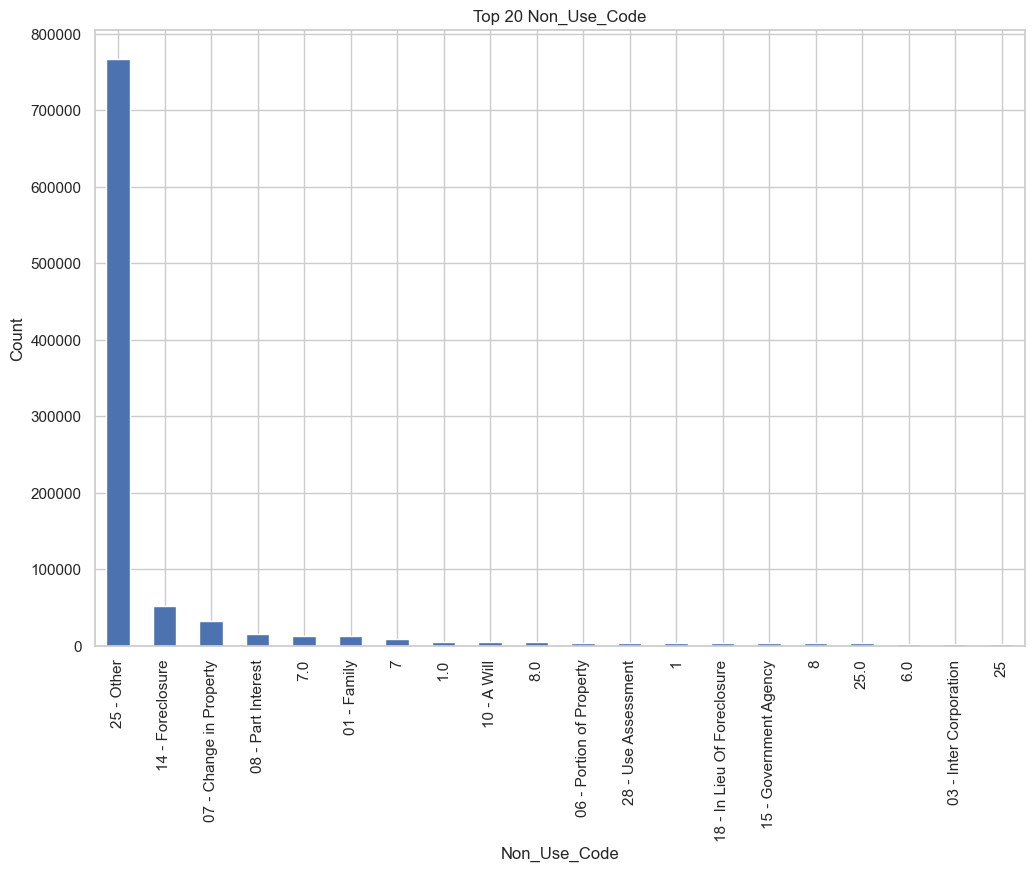

In [126]:
# Setting a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the top 20 values of Non_Use_Code
Top_20_NUC.plot(kind='bar')
plt.title('Top 20 Non_Use_Code')
plt.xlabel('Non_Use_Code')
plt.ylabel('Count')
plt.savefig('objective5_plot1.png')
plt.show()

- From the plot, 25-Other has the highest value count followed by 14-Foreclosure and 07-change in Property.

In [79]:
Selected_Non_Use_Code = ["25 - Other", "08 - Part Interest", "14 - Foreclosure","01 - Family", "02 - Love and Affection", "03 - Inter Corporation", "04 - Correcting Deed","05 - Deed Date"]
Selected_Non_Use_Code
#we just need to use a sample so that we can get a readable and understandable visualization

['25 - Other',
 '08 - Part Interest',
 '14 - Foreclosure',
 '01 - Family',
 '02 - Love and Affection',
 '03 - Inter Corporation',
 '04 - Correcting Deed',
 '05 - Deed Date']

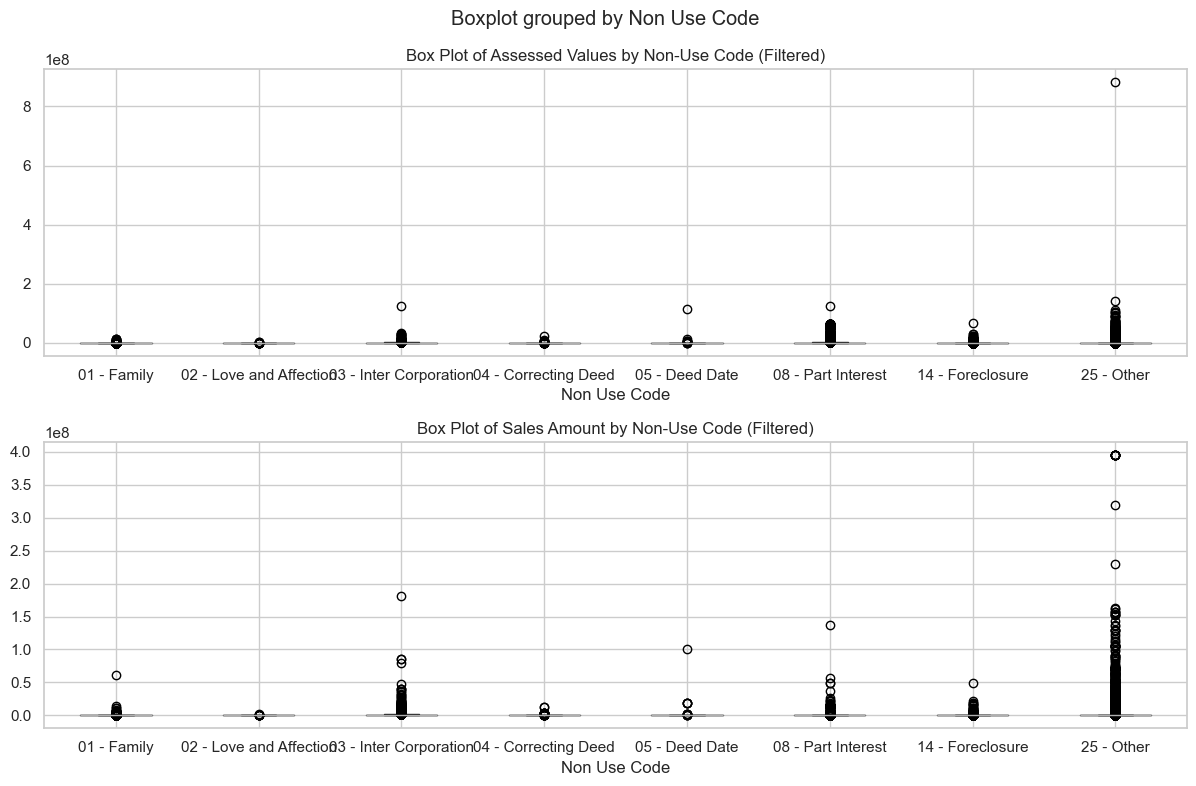

In [80]:
# Create visualizations to represent the data
filtered_data = df1[df1["Non Use Code"].isin(Selected_Non_Use_Code)]

# Create visualizations to represent the filtered data
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Box plot for Assessed Values by Non-Use Code (filtered data)
filtered_data.boxplot(column='Assessed Value', by='Non Use Code', ax=ax[0])
ax[0].set_title('Box Plot of Assessed Values by Non-Use Code (Filtered)')


# Histogram for Sale Amounts by Non-Use Code (filtered data)
filtered_data.boxplot(column='Sale Amount', by='Non Use Code', ax=ax[1])
ax[1].set_title('Box Plot of Sales Amount by Non-Use Code (Filtered)')

plt.tight_layout()
plt.show()

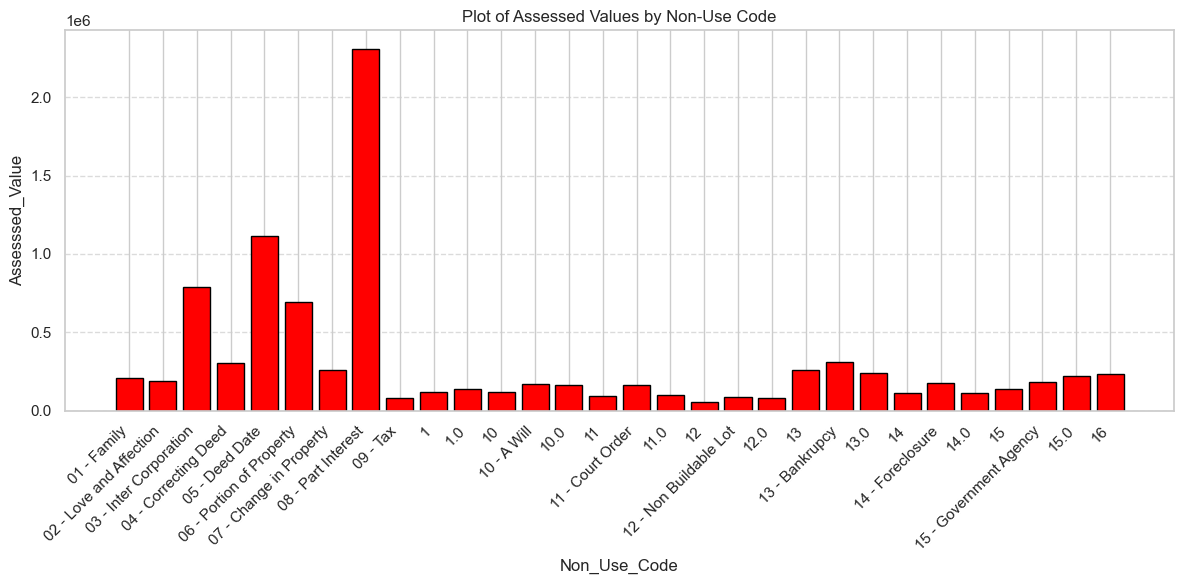

In [128]:
#plot for the Grouped Non_Use Code in respect to Assessed value (#this is just a sample because the values  for the non_use_code column is many so it will get clustered)


#limiting to the Grouped_NUC1 dataframe to 30 rows only so that we have a clearer view of the visualization
Sample_Grouped_NUC = Grouped_NUC.head(30)

#bar chart to show clearer insights 
plt.figure(figsize=(12, 6))
plt.bar(Sample_Grouped_NUC.index, Sample_Grouped_NUC["Assessed Value"], color='red',edgecolor = 'black')

# Adding labels and title
plt.xlabel('Non_Use_Code')
plt.ylabel('Assesssed_Value')
plt.title('Plot of Assessed Values by Non-Use Code')

# Display the plot
# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('objective5_plot2.png')
plt.show()

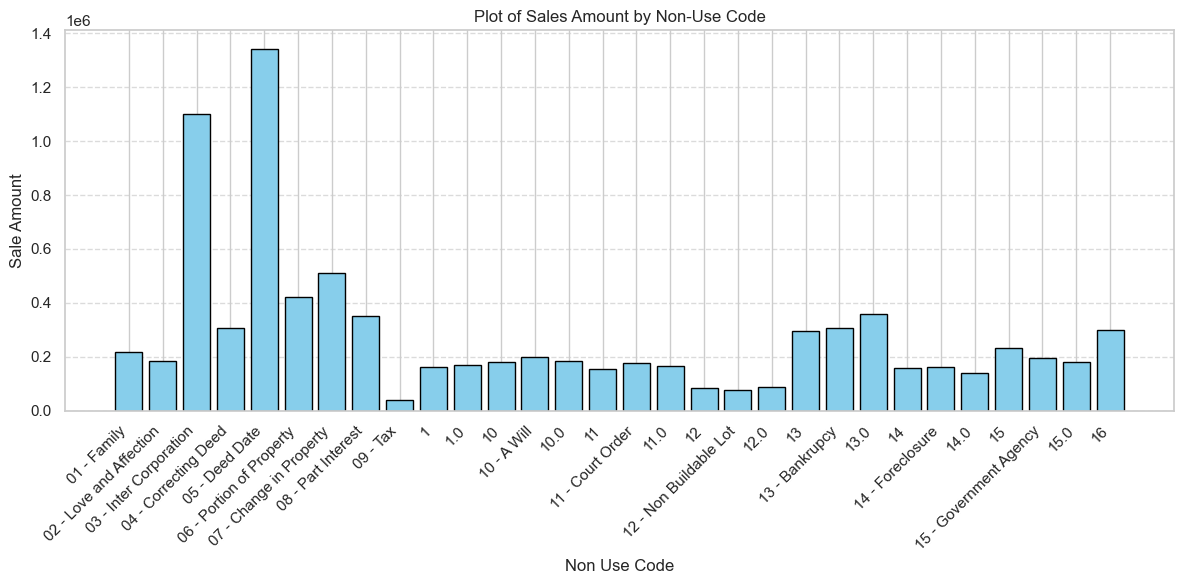

In [130]:
#plot for the Grouped Non_Use Code in respect to Sale Amount (#this is just a sample because the count for non_use_code is many so it will get clustered)
#bar chart to show clearer insights 
plt.figure(figsize=(12, 6))
plt.bar(Sample_Grouped_NUC.index, Sample_Grouped_NUC["Sale Amount"], color='skyblue',edgecolor = 'black')

# Adding labels and title
plt.xlabel('Non Use Code')
plt.ylabel('Sale Amount')
plt.title('Plot of Sales Amount by Non-Use Code')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('objective5_plot3.png')
plt.show()

### Statistical_summary

In [83]:
Statistical_summary = df1.groupby('Non Use Code')[['Assessed Value', 'Sale Amount']].agg(['mean', 'median', 'std'])

#view
Statistical_summary

Assessed Value                           Sale Amount  \
                                  mean    median           std          mean   
Non Use Code                                                                   
01 - Family               2.107349e+05  154140.0  3.362083e+05  2.180012e+05   
02 - Love and Affection   1.864091e+05  149100.0  1.519499e+05  1.836899e+05   
03 - Inter Corporation    7.888358e+05  195785.0  3.083437e+06  1.099418e+06   
04 - Correcting Deed      3.051562e+05  143990.0  1.230299e+06  3.071139e+05   
05 - Deed Date            1.115237e+06  165205.0  9.022068e+06  1.343108e+06   
...                                ...       ...           ...           ...   
8.0                       8.789015e+05  112820.0  4.338205e+06  1.718862e+05   
88                        4.340000e+04   43400.0           NaN  7.000000e+04   
9                         4.336900e+04   38360.0  3.002257e+04  3.028515e+04   
9.0                       4.498379e+04   32830.0  5.068428e+04  5.260172e+04   
Single Family             9.905667e+04  132200.0  7.808200e+04  1.606667e+05   

                                                 
                           median           std  
Non Use Code                                     
01 - Family              160000.0  6.360171e+05  
02 - Love and Affection  152000.0  2.127149e+05  
03 - Inter Corporation   180500.0  5.232477e+06  
04 - Correcting Deed     162000.0  9.025913e+05  
05 - Deed Date           225000.0  8.242823e+06  
...                           ...           ...  
8.0                       77825.0  4.792694e+05  
88                        70000.0           NaN  
9                         26550.0  1.852932e+04  
9.0                       13000.0  1.173999e+05  
Single Family            205000.0  1.179251e+05  

[106 rows x 6 columns]

In [ ]:
df1.columns

In [95]:
import pandas as pd

# Assuming your DataFrame is named 'your_dataframe'
# You can load your data into a DataFrame using your data source
# Example: your_dataframe = pd.read_csv('your_data.csv')

# Filter rows based on conditions
filtered_rows = df1[(df1['Non Use Code'] == 'Family') & (df1['Assessed Value'] > 154140.0)]

# Count the number of rows
count_filtered_rows = len(filtered_rows)

# Display the count
print(f"The count of rows where Non Use Code is 'Family' and Assessed Value > 154,140.0 is: {count_filtered_rows}")


The count of rows where Non Use Code is 'Family' and Assessed Value > 154,140.0 is: 0


In [84]:
#taking part of the dataset as a sample to have a clearer view.

Statistical_summary1 = df1.groupby('Non Use Code')[['Assessed Value', 'Sale Amount']].agg(['mean', 'median', 'std'])[:20]

#view
Statistical_summary1

Assessed Value                           Sale Amount  \
                                   mean    median           std          mean   
Non Use Code                                                                    
01 - Family                2.107349e+05  154140.0  3.362083e+05  2.180012e+05   
02 - Love and Affection    1.864091e+05  149100.0  1.519499e+05  1.836899e+05   
03 - Inter Corporation     7.888358e+05  195785.0  3.083437e+06  1.099418e+06   
04 - Correcting Deed       3.051562e+05  143990.0  1.230299e+06  3.071139e+05   
05 - Deed Date             1.115237e+06  165205.0  9.022068e+06  1.343108e+06   
06 - Portion of Property   6.909230e+05  195580.0  3.097621e+06  4.202217e+05   
07 - Change in Property    2.619759e+05  132930.0  9.081077e+05  5.105849e+05   
08 - Part Interest         2.310935e+06  200200.0  8.297082e+06  3.528952e+05   
09 - Tax                   8.237756e+04   59870.0  1.370933e+05  4.037382e+04   
1                          1.207848e+05   96390.0  1.128173e+05  1.643895e+05   
1.0                        1.354159e+05   98000.0  2.101210e+05  1.683848e+05   
10                         1.162853e+05   84070.0  1.647997e+05  1.809191e+05   
10 - A Will                1.678212e+05  134700.0  2.146372e+05  1.989075e+05   
10.0                       1.653074e+05   79900.0  9.870383e+05  1.865008e+05   
11                         9.579804e+04   76880.0  8.190508e+04  1.568143e+05   
11 - Court Order           1.637303e+05  125161.0  2.552651e+05  1.770133e+05   
11.0                       1.028267e+05   78295.0  1.236409e+05  1.661846e+05   
12                         5.369425e+04   16625.0  9.306102e+04  8.474204e+04   
12 - Non Buildable Lot     9.015763e+04   13575.0  4.580432e+05  7.844223e+04   
12.0                       8.023872e+04   26950.0  1.792103e+05  8.951769e+04   

                                                  
                            median           std  
Non Use Code                                      
01 - Family               160000.0  6.360171e+05  
02 - Love and Affection   152000.0  2.127149e+05  
03 - Inter Corporation    180500.0  5.232477e+06  
04 - Correcting Deed      162000.0  9.025913e+05  
05 - Deed Date            225000.0  8.242823e+06  
06 - Portion of Property  130000.0  2.266192e+06  
07 - Change in Property   327293.0  1.219935e+06  
08 - Part Interest         90000.0  2.004000e+06  
09 - Tax                   21681.5  5.964026e+04  
1                         130000.0  1.862492e+05  
1.0                       130000.0  2.229473e+05  
10                        145000.0  2.183146e+05  
10 - A Will               160000.0  2.538535e+05  
10.0                      130000.0  3.307320e+05  
11                        120000.0  1.905713e+05  
11 - Court Order          130900.0  3.651542e+05  
11.0                      121000.0  2.292164e+05  
12                         19000.0  2.437722e+05  
12 - Non Buildable Lot     18780.0  2.051436e+05  
12.0                       20000.0  2.426860e+05

#### ***VISUALIZATION OF ASSESSMENT ACCURACY METRICS FOR DIFFERENT NON USE CODE***

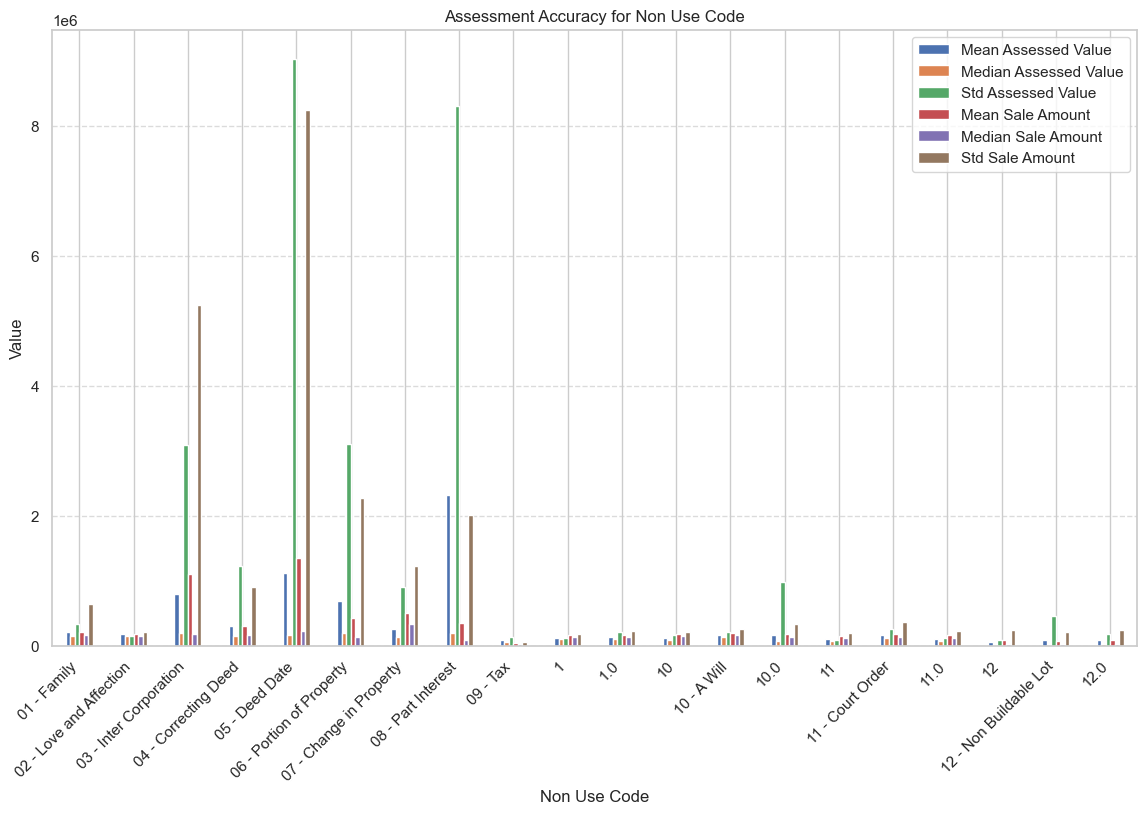

In [85]:
# Selecting specific property types and metrics
selected_metrics = Statistical_summary1.loc[:, [('Assessed Value', 'mean'), ('Assessed Value', 'median'),
                                            ('Assessed Value', 'std'), ('Sale Amount', 'mean'),
                                            ('Sale Amount', 'median'), ('Sale Amount', 'std')]]

# Plotting grouped bar plot
selected_metrics.plot(kind='bar', figsize=(14, 8))
plt.title('Assessment Accuracy for Non Use Code')
plt.xlabel('Non Use Code')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Mean Assessed Value', 'Median Assessed Value', 'Std Assessed Value', 'Mean Sale Amount', 'Median Sale Amount', 'Std Sale Amount'])


### INSIGHT 


- Non-use codes highlight  atypical property transfers that may not follow traditional market dynamics. For example, transactions labeled with codes such as "Deed Date" or "Correcting Deed" may involve unique circumstances that differ from typical market transactions.

- The nature of the transaction indicated by non-use codes can influence the assessed value of the property. For instance, transactions categorized as family transfers or love and affection may not reflect market value accurately and could result in assessed values that differ from typical market prices.

- Non-use codes provide insights into sales transactions beyond standard market transactions. They offer context regarding the relationship between the buyer and seller, the purpose of the transaction, or any legal considerations that may impact the property's value.

### Exploratory Data Analysis (EDA) for Objective 6:

In [86]:
#VALUE COUNT FOR OPM REMARK

print("Value Count for OPM Remrk: ", df1["OPM remarks"].value_counts())

Value Count for OPM Remrk:  OPM remarks
GOOD SALE PER MLS                                                            978213
NO MLS                                                                          500
NEW CONSTRUCTION                                                                345
SHORT SALE PER MLS                                                              326
TOTAL RENOVATION PER MLS                                                        316
                                                                              ...  
PER MLS HOUSE NEEDS SIGNIFICANT WORK                                              1
SECOND SALE FROM FORECLOSURE - PER MLS NEEDS RENOVATION - ALSO SEE #17101         1
PER MLS SOLD WITH INTERIOR RENOVATIONS PARTIALLY COMPLETED                        1
ASSESSMENT CHANGE FROM PREVIOUS SALE - SEE #170435                                1
PER MLS CLOSING PRICE = $1,145,000                                                1
Name: count, Length: 4817, dtype: in

In [87]:
#VALUE COUNT FOR ASSESSOR REMARK

print("Value Count for Asssessor Remrk: ", df["Assessor Remarks"].value_counts())

Value Count for Asssessor Remrk:  Assessor Remarks
ESTATE SALE                                                               852343
BELOW MARKET                                                                2568
SHORT SALE                                                                  2510
NEW CONSTRUCTION                                                            2048
FORECLOSURE                                                                 1847
                                                                           ...  
estate sale;per verification house substan worse than as of assmt date         1
SOLD W/ GARAGE UNIT G-1                                                        1
sold less than market value                                                    1
no typical marketing/inconsistent value for area                               1
MOTIVATED SELLER -DIVORCE                                                      1
Name: count, Length: 66507, dtype: int64


In [92]:
group_remark = df1.groupby(['Assessor Remarks', 'OPM remarks'])['Property Type'].unique()

# Display the grouped data
group_remark

Assessor Remarks                                                           OPM remarks      
"AS IS SALE"                                                               GOOD SALE PER MLS    [Single Family]
"AS IS" SALE                                                               GOOD SALE PER MLS            [Condo]
"AS IS" SALE - ALSO INCLUDES A LOT ACROSS THE STREET                       GOOD SALE PER MLS    [Single Family]
"AS IS" SUBJECT TO PROBATE                                                 GOOD SALE PER MLS    [Single Family]
"BROADCAST HOUSE"                                                          GOOD SALE PER MLS    [Single Family]
                                                                                                     ...       
work done on property prior to sale and after assmt date                   GOOD SALE PER MLS    [Single Family]
zone change to more intensive use afer assessment date                     GOOD SALE PER MLS    [Single Family]
zone chg to

### INSIGHT 

- The dataset features diverse Assessor Remarks, ranging from indications like "AS IS SALE," "AS IS SUBJECT TO PROBATE," to more detailed descriptions such as "AS IS SALE - ALSO INCLUDES A LOT ACROSS THE STREET," "BROADCAST HOUSE," and "work done on property prior to sale and after assmt date."

- Notably, the OPM Remarks consistently state "GOOD SALE PER MLS" for a majority of entries. This observation implies that the property sales, according to the Office of Property Management (OPM), are deemed favorable based on Multiple Listing Service (MLS) data.

- Each unique Assessor Remark likely signifies specific factors or events that influence the assessment process, such as property condition, legal considerations, or transaction details.

In [93]:
import nltk
nltk.download('punkt', download_dir=r'C:\Users\USER\Documents\Python Scripts\Machine learning\Linear Regression', quiet=True)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [132]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Assessor_Remarks' and 'OPM_Remarks'
# Replace these column names with the actual column names in your DataFrame

# Tokenize and filter stopwords for OPM Remarks
df1['Tokenized_OPM_Remarks'] = df1['OPM remarks'].apply(word_tokenize)
df1['Filtered_OPM_Remarks'] = df1['Tokenized_OPM_Remarks'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])

# Tokenize and filter stopwords for Assessor Remarks
df['Tokenized_Assessor_Remarks'] = df['Assessor Remarks'].apply(word_tokenize)
df['Filtered_Assessor_Remarks'] = df['Tokenized_Assessor_Remarks'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])

# Create a frequency distribution of words for OPM Remarks
fdist_opm = FreqDist([word for sublist in df1['Filtered_OPM_Remarks'] for word in sublist])

# Display the most common words in OPM Remarks
common_words_opm = fdist_opm.most_common(20)
print("Top 20 Most Common Words in OPM Remarks:")
print(common_words_opm)

# Plot a bar chart of the most common words in OPM Remarks
plt.figure(figsize=(10, 6))
fdist_opm.plot(20, cumulative=False)
plt.title("Top 20 Most Common Words in OPM Remarks")
plt.show()

# Create a frequency distribution of words for Assessor Remarks
fdist_assessor = FreqDist([word for sublist in df1['Filtered_Assessor_Remarks'] for word in sublist])

# Display the most common words in Assessor Remarks
common_words_assessor = fdist_assessor.most_common(20)
print("\nTop 20 Most Common Words in Assessor Remarks:")
print(common_words_assessor)

# Plot a bar chart of the most common words in Assessor Remarks
plt.figure(figsize=(10, 6))
fdist_assessor.plot(20, cumulative=False)
plt.title("Top 20 Most Common Words in Assessor Remarks")
plt.savefig('objective6_plot1.png'
plt.show()


SyntaxError: '(' was never closed (452377694.py, line 43)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


Most Common Words in Remarks:
[('sale', 1867527), ('per', 988800), ('mls', 987003), ('good', 978400), ('estate', 849927), ('foreclosure', 9874), ('market', 9446), ('property', 9126), ('sold', 8770), ('new', 6094)]


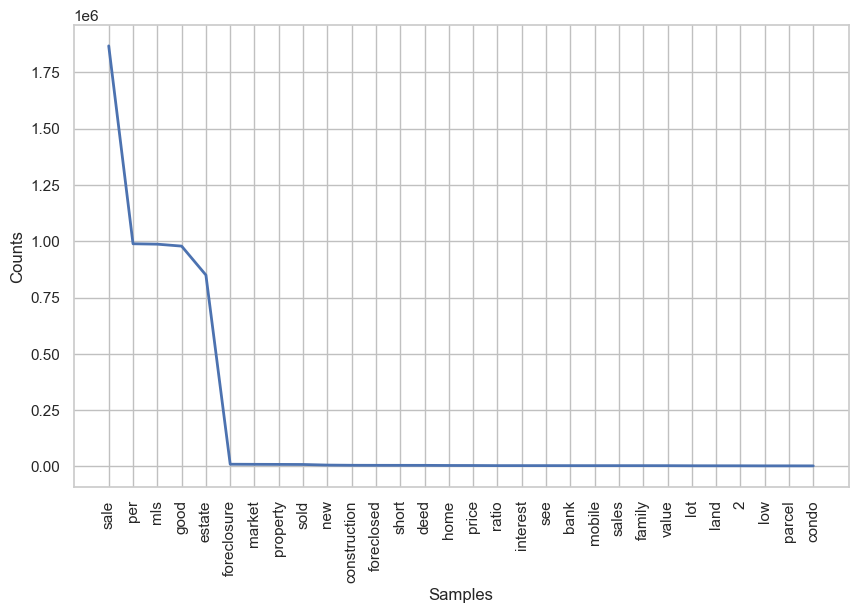

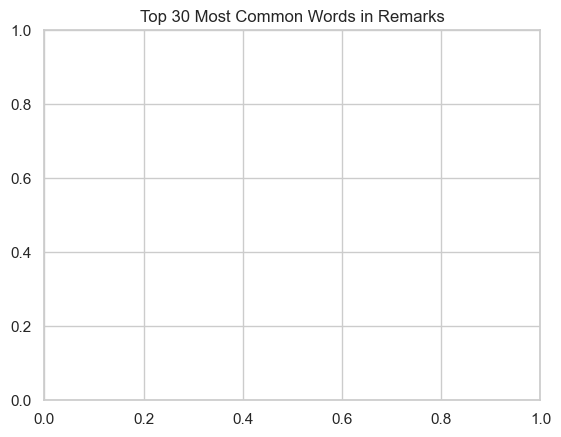

In [131]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')


# Assuming you have a DataFrame named 'df' with a column 'Assessor_Remarks' and 'OPM_Remarks'
# Replace these column names with the actual column names in your DataFrame

df1 = df1.copy()
df1['Combined Remarks'] = df1['Assessor Remarks'].astype(str) + ' ' + df['OPM remarks'].astype(str)


# Tokenize the remarks
df1['Tokenized Remarks'] = df1['Combined Remarks'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df1['Filtered Remarks'] = df1['Tokenized Remarks'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])

# Flatten the list of filtered remarks
flat_filtered_remarks = [word for sublist in df1['Filtered Remarks'] for word in sublist]

# Create a frequency distribution of words
fdist = FreqDist(flat_filtered_remarks)

# Display the most common words and their frequencies
common_words = fdist.most_common(10)
print("Most Common Words in Remarks:")
print(common_words)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.title("Top 30 Most Common Words in Remarks")
plt.savefig('objective6_plot1.png')
plt.show()


### Recommendation

- Recommend enhancing data collection processes to capture more detailed and standardized Assessor Remarks to improve the accuracy and depth of property assessments.

- Recommend implementing a feedback mechanism to gather input from assessors and stakeholders on the effectiveness of utilizing Assessor Remarks in property assessments, enabling continuous improvement.

- Suggest optimizing the property assessment process by leveraging insights from the analysis to streamline assessments, identify key factors influencing valuations, and improve decision-making